# Posthoc Analysis of IMAGEN:
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

<br>
Such in-depth understanding can be achieved by performing follow-up analysis:

In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from imagen_posthocloader import *
from plot_results_posthoc import *
%matplotlib inline

In [2]:
DATA_DIR = "/ritter/share/data/IMAGEN"
posthoc = IMAGEN_posthoc()

# 4. Visualization SHAP
## 4.1. SHAP values

### 4.1.1. Get the plot

<b> Load the dataset </b>

In [3]:
BL = "newholdout-clean-bl-espad-fu3-19a-binge-n102.h5"
FU2 = "newholdout-clean-fu2-espad-fu3-19a-binge-n102.h5"
FU3 = "newholdout-clean-fu3-espad-fu3-19a-binge-n102.h5"

RBF0_FU3 = "/ritter/share/jihoon/imagen_ml/posthoc_analysis/test/SVM-rbf0_FU3.sav"
RBF1_FU3 = "/ritter/share/jihoon/imagen_ml/posthoc_analysis/test/SVM-rbf1_FU3.sav"
RBF2_FU3 = "/ritter/share/jihoon/imagen_ml/posthoc_analysis/test/SVM-rbf2_FU3.sav"
RBF3_FU3 = "/ritter/share/jihoon/imagen_ml/posthoc_analysis/test/SVM-rbf3_FU3.sav"
RBF4_FU3 = "/ritter/share/jihoon/imagen_ml/posthoc_analysis/test/SVM-rbf4_FU3.sav"
RBF5_FU3 = "/ritter/share/jihoon/imagen_ml/posthoc_analysis/test/SVM-rbf5_FU3.sav"
RBF6_FU3 = "/ritter/share/jihoon/imagen_ml/posthoc_analysis/test/SVM-rbf6_FU3.sav"

<b> ROI 01: summary bar plot of feature importnace </b>

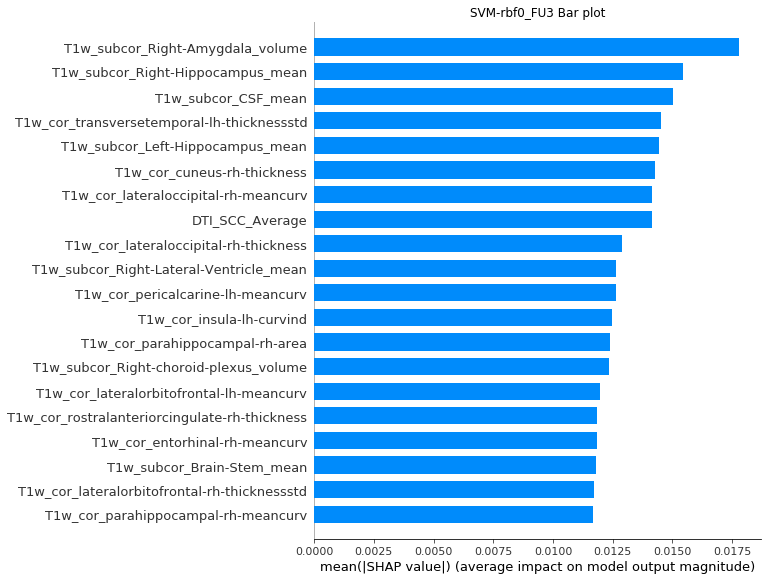

In [4]:
# Plot type: 'Bar', 'Swarm', 'Sex', and 'Class'
SHAP_plot(FU3, RBF0_FU3, 'Bar')#, fig=True)

<b> ROI 02: swarm plot showing shap values vs feature values ordered by feature importance </b>

In [5]:
# SHAP_plot(FU3, RBF0_FU3, 'Swarm')#, fig=True)

<b> ROI 03: Class difference plot showing shap values vs feature values ordered by feature importance </b>

In [6]:
# SHAP_plot(FU3, RBF0_FU3, 'Class')#, fig=True)

<b> ROI 04: Sex difference plot showing shap values vs feature values ordered by feature importance </b>

In [7]:
# SHAP_plot(FU3, RBF0_FU3, 'Sex')#, fig=True)

### 4.1.2. Distribution sorted by descending oder of mean|SHAP value| in SVM-rbf

<b>Load the SHAP</b>

In [8]:
SHAP_SVM_rbf = posthoc.read_SHAP('IMAGEN_SHAP_SVM_rbf.csv')

In [9]:
SHAP_SVM_rbf.columns[76:83]

Index(['sorted SVM rbf0 mean', 'sorted SVM rbf1 mean', 'sorted SVM rbf2 mean',
       'sorted SVM rbf3 mean', 'sorted SVM rbf4 mean', 'sorted SVM rbf5 mean',
       'sorted SVM rbf6 mean'],
      dtype='object')

<b>mean|SHAP| distribution</b>

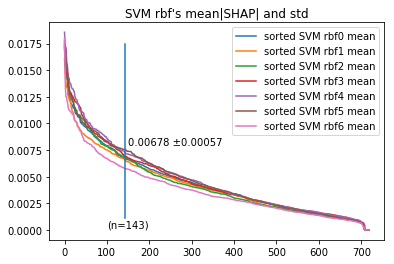

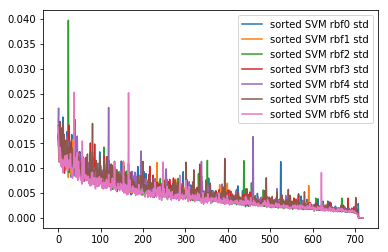

In [10]:
mean = round(SHAP_SVM_rbf.loc[143][76:83].mean(), 5)
std = round(SHAP_SVM_rbf.loc[143][76:83].std(), 5)
# mean
ax2 = SHAP_SVM_rbf[SHAP_SVM_rbf.columns[76:83]].plot()
# text
plt.title("SVM rbf's mean|SHAP| and std")
plt.axvline(x=143, ymin=0.1, ymax=0.9)
plt.text(100, 0.0002, '(n=143)')
plt.text(150, 0.008, f"{mean} \u00B1{std}")
# std
SHAP_SVM_rbf[SHAP_SVM_rbf.columns[83:]].plot()

20% point: 143


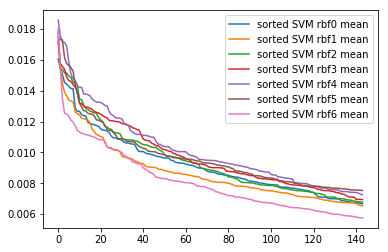

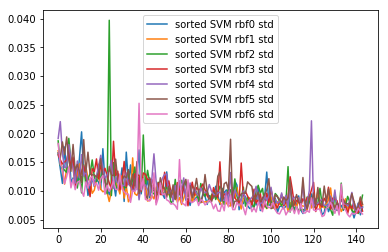

In [11]:
number = math.floor(len(SHAP_SVM_rbf)*0.2)
ST_SVM_rbf = SHAP_SVM_rbf.loc[:number]
# Mean
ST_SVM_rbf[ST_SVM_rbf.columns[76:83]].plot()
# Std
ST_SVM_rbf[ST_SVM_rbf.columns[83:]].plot()
print(f"20% point: {number}")

### 4.1.3. Consistent feature importance in SVM-rbf

<b>Generate the SHAP table</b>

In [12]:
DF = SHAP_SVM_rbf

In [13]:
SHAP_table(DF, viz = False)

Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI         63        63        63        63        63   
1  T1w subcortical        108       108       108       108       108   
2     T1w cortical        548       548       548       548       548   

   SVM-rbf5  SVM-rbf6  Intersection  
0        63        63            63  
1       108       108           108  
2       548       548           548

<b> Top 1 - Common feature importance (n=7)

In [25]:
SHAP_top30 = SHAP_SVM_rbf.loc[:7]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=1): {'DTI_SCC_Average'} 

selected T1w Subcortical: (n=0): set() 

selected T1w Cortical: (n=0): set() 




Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI          1         1         1         1         1   
1  T1w subcortical          4         4         3         3         1   
2     T1w cortical          3         3         4         4         6   

   SVM-rbf5  SVM-rbf6  Intersection  
0         1         1             1  
1         3         1             0  
2         4         6             0

<b> Top 2 - Common feature importance (n=9)

In [22]:
SHAP_top30 = SHAP_SVM_rbf.loc[:9]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=1): {'DTI_SCC_Average'} 

selected T1w Subcortical: (n=1): {'T1w_subcor_CSF_mean'} 

selected T1w Cortical: (n=0): set() 




Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI          1         1         1         1         1   
1  T1w subcortical          5         4         4         5         3   
2     T1w cortical          4         5         5         4         6   

   SVM-rbf5  SVM-rbf6  Intersection  
0         1         1             1  
1         5         3             1  
2         4         6             0

<b> Top 5 - Common feature importance (n=25)

In [34]:
SHAP_top30 = SHAP_SVM_rbf.loc[:25]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=1): {'DTI_SCC_Average'} 

selected T1w Subcortical: (n=3): {'T1w_subcor_Right-Amygdala_volume', 'T1w_subcor_CSF_mean', 'T1w_subcor_Brain-Stem_mean'} 

selected T1w Cortical: (n=1): {'T1w_cor_lateraloccipital-rh-thickness'} 




Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI          1         1         3         2         1   
1  T1w subcortical          9         8         7        14        10   
2     T1w cortical         16        17        16        10        15   

   SVM-rbf5  SVM-rbf6  Intersection  
0         2         1             1  
1        14        10             3  
2        10        15             1

<b> Top 10 - Common feature importance (n=41)

In [44]:
SHAP_top30 = SHAP_SVM_rbf.loc[:41]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=1): {'DTI_SCC_Average'} 

selected T1w Subcortical: (n=5): {'T1w_subcor_Right-Amygdala_volume', 'T1w_subcor_Left-choroid-plexus_volume', 'T1w_subcor_CSF_mean', 'T1w_subcor_Left-Hippocampus_mean', 'T1w_subcor_Brain-Stem_mean'} 

selected T1w Cortical: (n=4): {'T1w_cor_superiorparietal-rh-thickness', 'T1w_cor_lateraloccipital-rh-thickness', 'T1w_cor_rostralanteriorcingulate-rh-thickness', 'T1w_cor_caudalanteriorcingulate-lh-foldind'} 




Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI          2         2         3         3         2   
1  T1w subcortical         13        14        12        17        12   
2     T1w cortical         27        26        27        22        28   

   SVM-rbf5  SVM-rbf6  Intersection  
0         3         2             1  
1        17        12             5  
2        22        28             4

<b> Top 15 - Common feature importance (n=57)

In [49]:
SHAP_top100 = SHAP_SVM_rbf.loc[:57]
DF = SHAP_top100
SHAP_table(DF, viz = True)

selected DTI (n=2): {'DTI_RLIC-R_Average', 'DTI_SCC_Average'} 

selected T1w Subcortical: (n=6): {'T1w_subcor_Right-Amygdala_volume', 'T1w_subcor_Left-choroid-plexus_volume', 'T1w_subcor_Right-choroid-plexus_mean', 'T1w_subcor_CSF_mean', 'T1w_subcor_Left-Hippocampus_mean', 'T1w_subcor_Brain-Stem_mean'} 

selected T1w Cortical: (n=7): {'T1w_cor_caudalanteriorcingulate-lh-foldind', 'T1w_cor_rostralanteriorcingulate-rh-thickness', 'T1w_cor_cuneus-rh-thickness', 'T1w_cor_pericalcarine-lh-meancurv', 'T1w_cor_superiorparietal-rh-thickness', 'T1w_cor_rostralanteriorcingulate-lh-thickness', 'T1w_cor_lateraloccipital-rh-thickness'} 




Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI          4         4         3         3         5   
1  T1w subcortical         14        17        17        22        13   
2     T1w cortical         40        37        38        33        40   

   SVM-rbf5  SVM-rbf6  Intersection  
0         3         5             2  
1        22        13             6  
2        33        40             7

<b> Top 44 - Common feature importance (n=143), Short tail (20%) </b>

In [50]:
print(f"20% point: {number}")
SHAP_20 = SHAP_SVM_rbf.loc[:number-1]
SHAP_80 = SHAP_SVM_rbf.loc[number:]
SHAP_20

20% point: 143


Feature name Modality             Type   Lobe Region  \
0                  DTI_SCC_Average      DTI       DTI region    DTI region   
1               DTI_RLIC-R_Average      DTI       DTI region    DTI region   
2                 DTI_RLIC_Average      DTI       DTI region    DTI region   
3                DTI_CGH-L_Average      DTI       DTI region    DTI region   
4               DTI_RLIC-L_Average      DTI       DTI region    DTI region   
..                             ...      ...              ...           ...   
138  T1w_cor_parsorbitalis-lh-area      T1w  Cortical region  Frontal lobe   
139    T1w_cor_paracentral-rh-area      T1w  Cortical region  Frontal lobe   
140    T1w_cor_frontalpole-rh-area      T1w  Cortical region  Frontal lobe   
141     T1w_cor_precentral-lh-area      T1w  Cortical region  Frontal lobe   
142  T1w_cor_parsorbitalis-rh-area      T1w  Cortical region  Frontal lobe   

       Value  GB0_FU3 mean  GB1_FU3 mean  GB2_FU3 mean  GB3_FU3 mean  \
0    Average      0.057137      0.029000      0.057843      0.000608   
1    Average      0.011225      0.010294      0.023490      0.033892   
2    Average      0.012275      0.000000      0.012676      0.004353   
3    Average      0.011471      0.023020      0.005010      0.026363   
4    Average      0.022284      0.002088      0.028637      0.053147   
..       ...           ...           ...           ...           ...   
138     area      0.000000      0.003186      0.002637      0.000000   
139     area      0.000000      0.000275      0.000000      0.000000   
140     area      0.001196      0.002627      0.000000      0.001569   
141     area      0.004029      0.004951      0.003853      0.000000   
142     area      0.002765      0.003922      0.000000      0.000000   

     GB4_FU3 mean  ...  sorted SVM rbf4 mean  sorted SVM rbf5 mean  \
0        0.023892  ...              0.018559              0.017451   
1        0.008029  ...              0.017569              0.017304   
2        0.001461  ...              0.017127              0.017284   
3        0.001716  ...              0.017118              0.016137   
4        0.015431  ...              0.016892              0.015745   
..            ...  ...                   ...                   ...   
138      0.000000  ...              0.007412              0.007569   
139      0.000000  ...              0.007412              0.007559   
140      0.000000  ...              0.007392              0.007559   
141      0.000000  ...              0.007363              0.007549   
142      0.000000  ...              0.007304              0.007549   

     sorted SVM rbf6 mean  sorted SVM rbf0 std  sorted SVM rbf1 std  \
0                0.018010             0.016507             0.016984   
1                0.015461             0.013869             0.015391   
2                0.013480             0.011296             0.013540   
3                0.012539             0.017646             0.011178   
4                0.012490             0.013309             0.013978   
..                    ...                  ...                  ...   
138              0.005853             0.006784             0.006557   
139              0.005843             0.005284             0.007213   
140              0.005804             0.006554             0.006140   
141              0.005784             0.007882             0.006698   
142              0.005755             0.005819             0.008764   

     sorted SVM rbf2 std  sorted SVM rbf3 std  sorted SVM rbf4 std  \
0               0.018709             0.016280             0.019121   
1               0.014480             0.015381             0.022063   
2               0.013947             0.014691             0.016430   
3               0.013604             0.015000             0.014036   
4               0.013177             0.015385             0.014214   
..                   ...                  ...                  ...   
138             0.006636            

In [51]:
DF = SHAP_20
SHAP_table(DF, viz = True)

selected DTI (n=4): {'DTI_CGH-L_Average', 'DTI_SCC_Average', 'DTI_RLIC_Average', 'DTI_RLIC-R_Average'} 

selected T1w Subcortical: (n=13): {'T1w_subcor_Right-Amygdala_volume', 'T1w_subcor_Right-Putamen_mean', 'T1w_subcor_Left-choroid-plexus_volume', 'T1w_subcor_3rd-Ventricle_mean', 'T1w_subcor_Right-choroid-plexus_mean', 'T1w_subcor_Left-Cerebellum-White-Matter_volume', 'T1w_subcor_Right-Amygdala_mean', 'T1w_subcor_Right-Inf-Lat-Vent_mean', 'T1w_subcor_CSF_mean', 'T1w_subcor_CC_Anterior_volume', 'T1w_subcor_Left-Hippocampus_mean', 'T1w_subcor_Right-Hippocampus_mean', 'T1w_subcor_Brain-Stem_mean'} 

selected T1w Cortical: (n=27): {'T1w_cor_middletemporal-lh-thickness', 'T1w_cor_isthmuscingulate-lh-meancurv', 'T1w_cor_superiorparietal-rh-thickness', 'T1w_cor_rostralanteriorcingulate-lh-thickness', 'T1w_cor_parahippocampal-lh-volume', 'T1w_cor_caudalanteriorcingulate-lh-volume', 'T1w_cor_caudalanteriorcingulate-lh-area', 'T1w_cor_caudalanteriorcingulate-lh-foldind', 'T1w_cor_inferiorparie

Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI         11        10        10        10        17   
1  T1w subcortical         26        31        32        31        27   
2     T1w cortical        106       102       101       102        99   

   SVM-rbf5  SVM-rbf6  Intersection  
0        10        17             4  
1        31        27            13  
2       102        99            27

<b> Bottom 438 - Common feature importance (n=576), Long tail (20%)</b>
SHAP_80

In [52]:
DF = SHAP_80
SHAP_table(DF, viz = False)

Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI         52        53        53        53        46   
1  T1w subcortical         82        77        76        77        81   
2     T1w cortical        442       446       447       446       449   

   SVM-rbf5  SVM-rbf6  Intersection  
0        53        46            38  
1        77        81            62  
2       446       449           338

### 4.1.4. Feature importance, mean|SHAP| distribution

<b>generate the columns</b>

In [54]:
SHAP = posthoc.read_SHAP('all_mofm_abs_SHAP.csv')

In [57]:
plt.rcParams["figure.figsize"] = (80,20)

<b> All model: Model by Model

In [62]:
SHAP_T = SHAP.transpose()
SHAP_T = SHAP_T.rename(columns=SHAP_T.iloc[1])
SHAP_Model = SHAP_T.iloc[5:33]
SHAP_T = SHAP_Model.astype('float')

In [ ]:
# plt.pcolor(SHAP_T)
# plt.title('Heatmap of Feature importance', fontsize=20)
# plt.colorbar()

Text(0.5, 1.0, 'Heatmap of Feature importance')

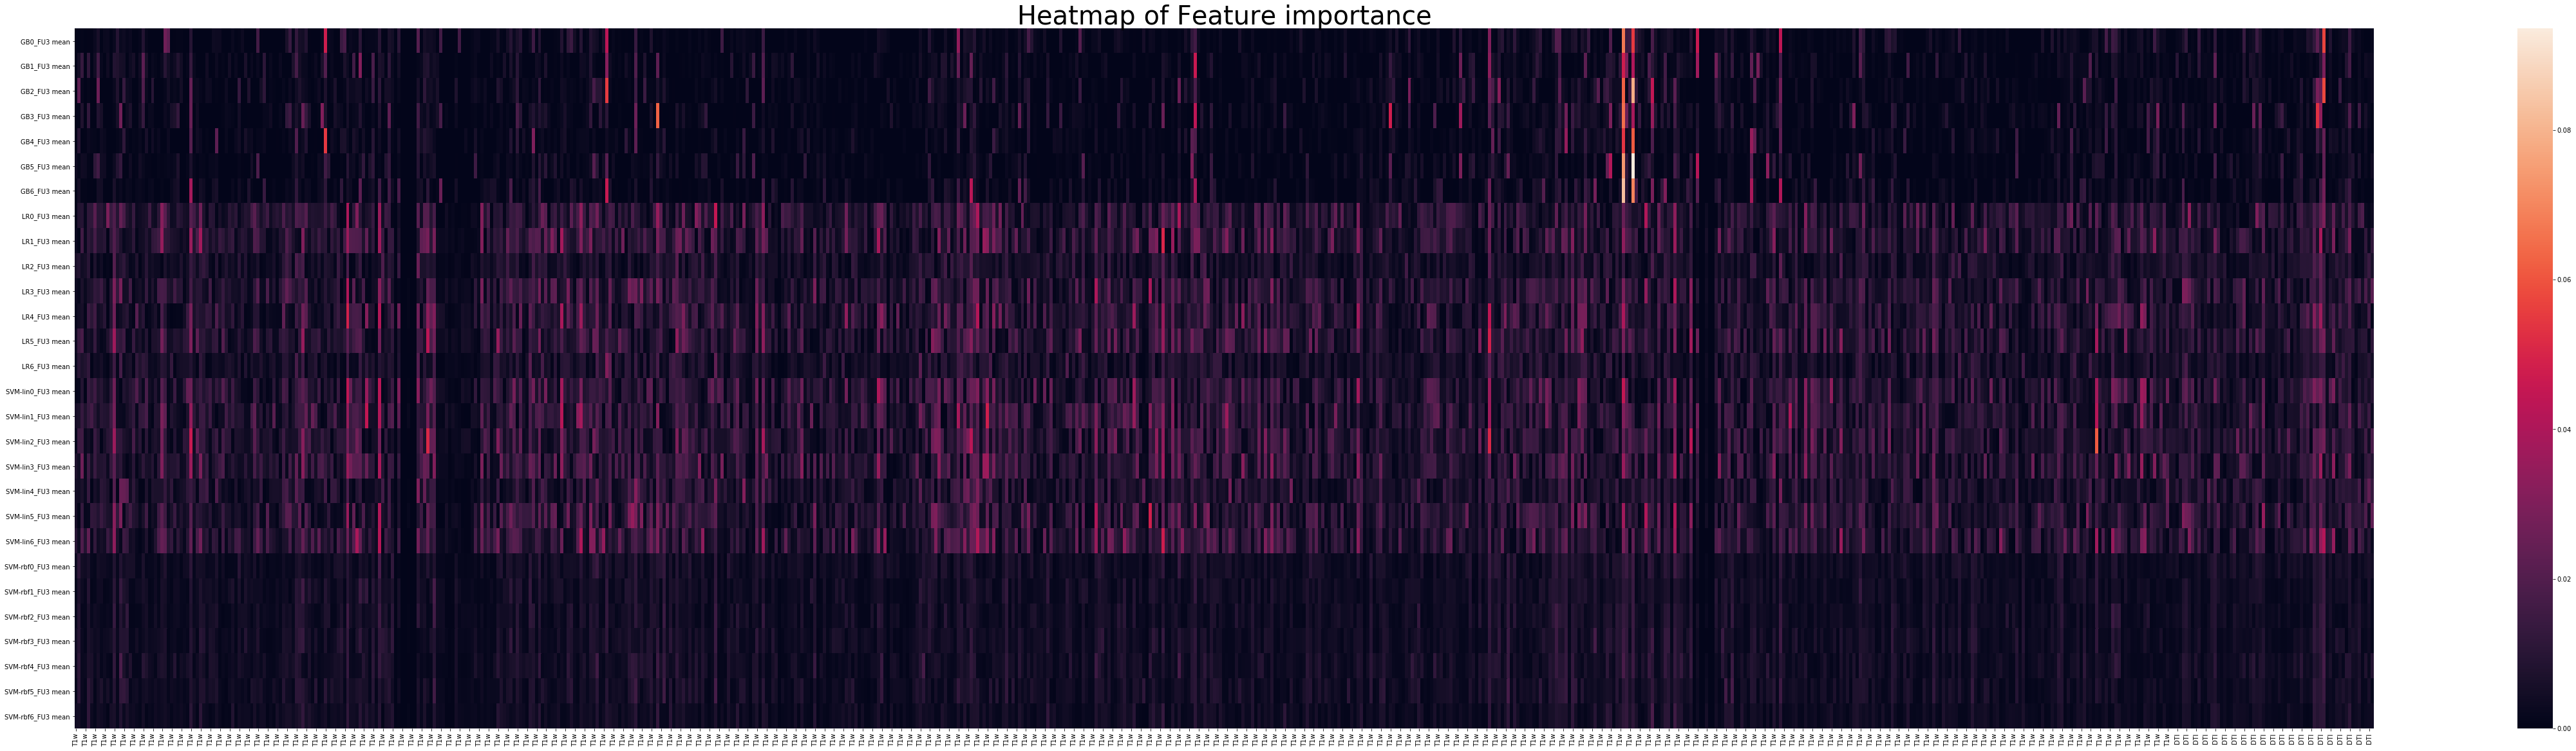

In [63]:
ax = sns.heatmap(SHAP_T)
plt.title('Heatmap of Feature importance', fontsize=40)
# plt.savefig('/figrues/Heatmap_SHAP_Model.pdf')

<b> GB and SVM-rbf

In [65]:
SHAP_Two = SHAP_T.loc[['GB0_FU3 mean','GB1_FU3 mean','GB2_FU3 mean',
            'GB3_FU3 mean','GB4_FU3 mean','GB5_FU3 mean','GB6_FU3 mean',
            'SVM-rbf0_FU3 mean','SVM-rbf1_FU3 mean','SVM-rbf2_FU3 mean','SVM-rbf3_FU3 mean',
            'SVM-rbf4_FU3 mean','SVM-rbf5_FU3 mean','SVM-rbf6_FU3 mean'], :]

In [ ]:
# plt.pcolor(SHAP_Two)
# plt.title('Heatmap of Feature importance', fontsize=20)
# plt.colorbar()

Text(0.5, 1.0, 'Heatmap of Feature importance')

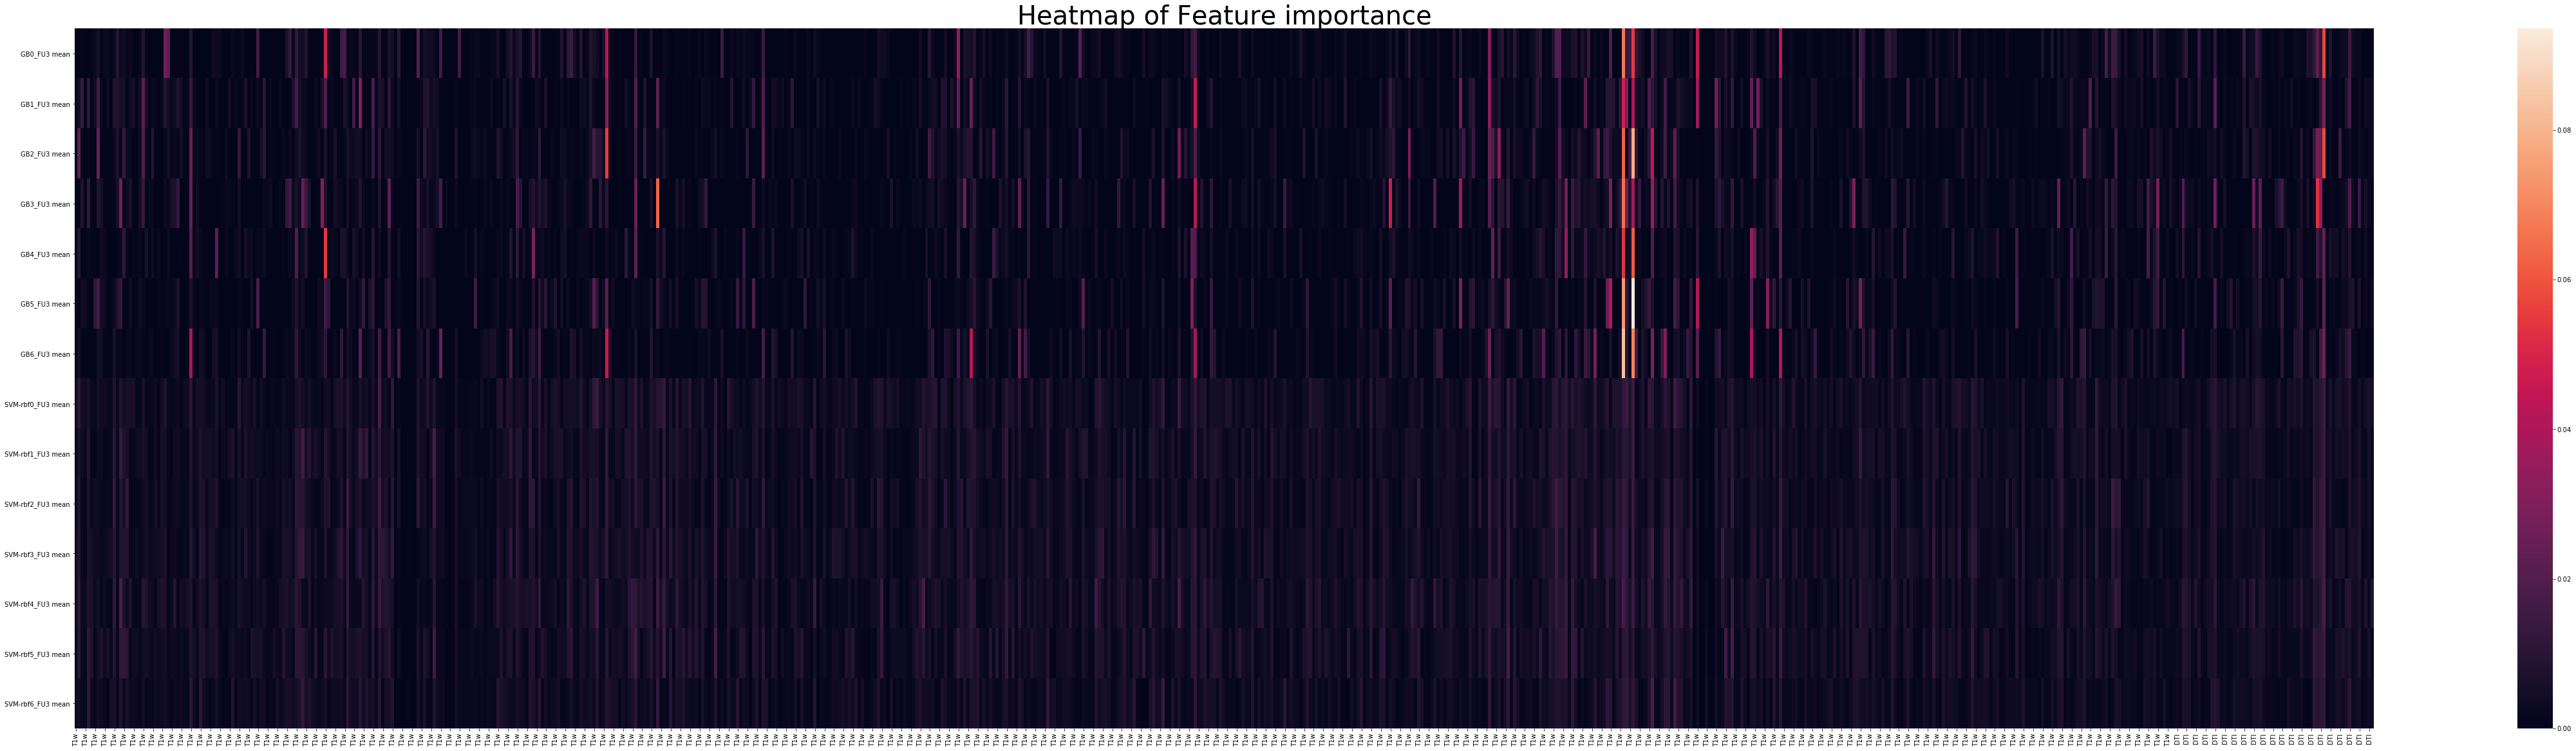

In [66]:
ax = sns.heatmap(SHAP_Two)
plt.title('Heatmap of Feature importance', fontsize=40)
# plt.savefig('figures/Heatmap_SHAP_GB_SVMrbf.pdf')

<b> All model: Trial by Trial <b>

In [67]:
SHAP_Trial = SHAP_T.loc[['LR0_FU3 mean','SVM-lin0_FU3 mean','GB0_FU3 mean','SVM-rbf0_FU3 mean',
                         'LR1_FU3 mean','SVM-lin1_FU3 mean','GB1_FU3 mean','SVM-rbf1_FU3 mean',
                         'LR2_FU3 mean','SVM-lin2_FU3 mean','GB2_FU3 mean','SVM-rbf2_FU3 mean',
                         'LR3_FU3 mean','SVM-lin3_FU3 mean','GB3_FU3 mean','SVM-rbf3_FU3 mean',
                         'LR4_FU3 mean','SVM-lin4_FU3 mean','GB4_FU3 mean','SVM-rbf4_FU3 mean',
                         'LR5_FU3 mean','SVM-lin5_FU3 mean','GB5_FU3 mean','SVM-rbf5_FU3 mean',
                         'LR6_FU3 mean','SVM-lin6_FU3 mean','GB6_FU3 mean','SVM-rbf6_FU3 mean'], :]

In [68]:
# plt.pcolor(SHAP_Trial)
# plt.title('Heatmap of mean|SHAP| on models', fontsize=40)
# plt.colorbar()

Text(0.5, 1.0, 'Heatmap of mean|SHAP| on models')

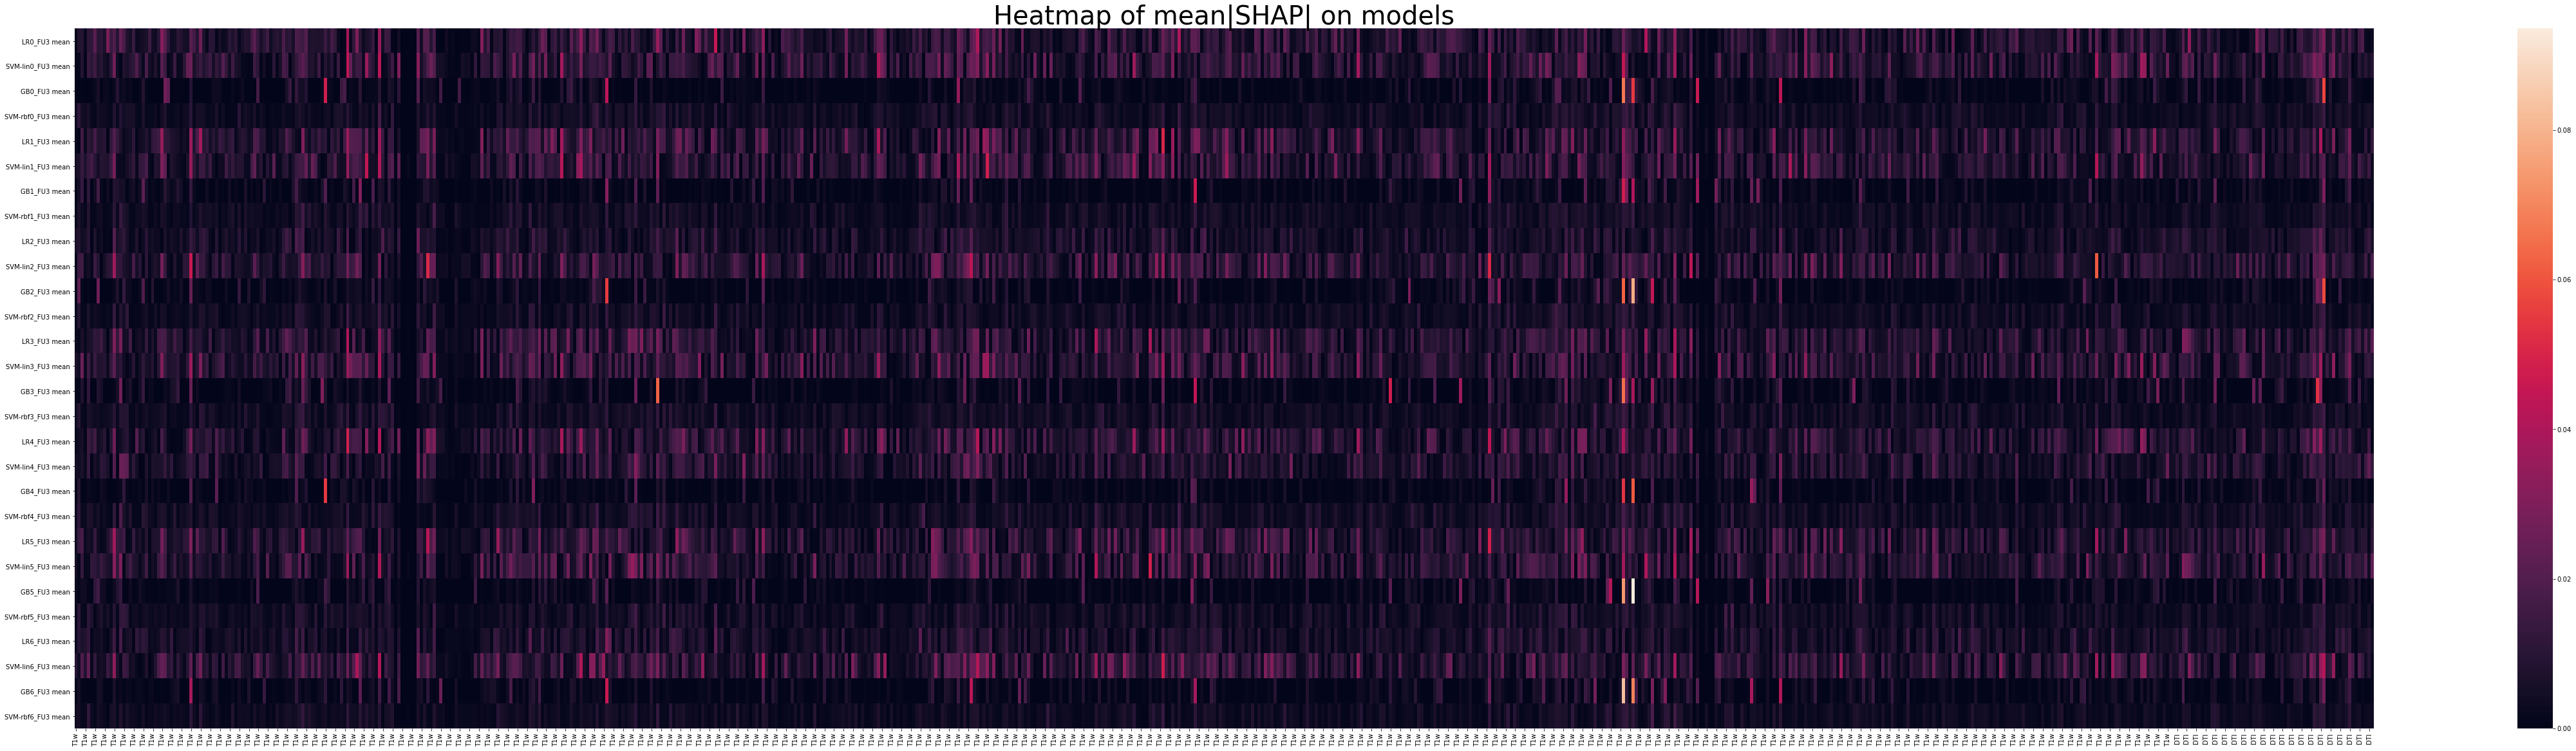

In [77]:
ax = sns.heatmap(SHAP_Trial)
plt.title('Heatmap of mean|SHAP| on models', fontsize=40)
# plt.savefig('figures/Heatmap_SHAP_Trial.pdf')

### 4.1.5. Feature importance in SVM-rbf, mean of mean|SHAP| distribution

<b> Sorted by value specific

In [89]:
SHAP2 = SHAP.sort_values(by=['Type','Value','Lobe Region','SVM-rbf0_FU3_All mean'],
                         ascending=[True,True,True,False])
SHAP2 = SHAP2.set_index('Feature name')

In [90]:
SHAP2.columns

Index(['Modality', 'Type', 'Lobe Region', 'Value', 'GB0_FU3 mean',
       'GB1_FU3 mean', 'GB2_FU3 mean', 'GB3_FU3 mean', 'GB4_FU3 mean',
       'GB5_FU3 mean', 'GB6_FU3 mean', 'LR0_FU3 mean', 'LR1_FU3 mean',
       'LR2_FU3 mean', 'LR3_FU3 mean', 'LR4_FU3 mean', 'LR5_FU3 mean',
       'LR6_FU3 mean', 'SVM-lin0_FU3 mean', 'SVM-lin1_FU3 mean',
       'SVM-lin2_FU3 mean', 'SVM-lin3_FU3 mean', 'SVM-lin4_FU3 mean',
       'SVM-lin5_FU3 mean', 'SVM-lin6_FU3 mean', 'SVM-rbf0_FU3 mean',
       'SVM-rbf1_FU3 mean', 'SVM-rbf2_FU3 mean', 'SVM-rbf3_FU3 mean',
       'SVM-rbf4_FU3 mean', 'SVM-rbf5_FU3 mean', 'SVM-rbf6_FU3 mean',
       'GB0_FU3 std', 'GB1_FU3 std', 'GB2_FU3 std', 'GB3_FU3 std',
       'GB4_FU3 std', 'GB5_FU3 std', 'GB6_FU3 std', 'LR0_FU3 std',
       'LR1_FU3 std', 'LR2_FU3 std', 'LR3_FU3 std', 'LR4_FU3 std',
       'LR5_FU3 std', 'LR6_FU3 std', 'SVM-lin0_FU3 std', 'SVM-lin1_FU3 std',
       'SVM-lin2_FU3 std', 'SVM-lin3_FU3 std', 'SVM-lin4_FU3 std',
       'SVM-lin5_FU3 std', 'SV

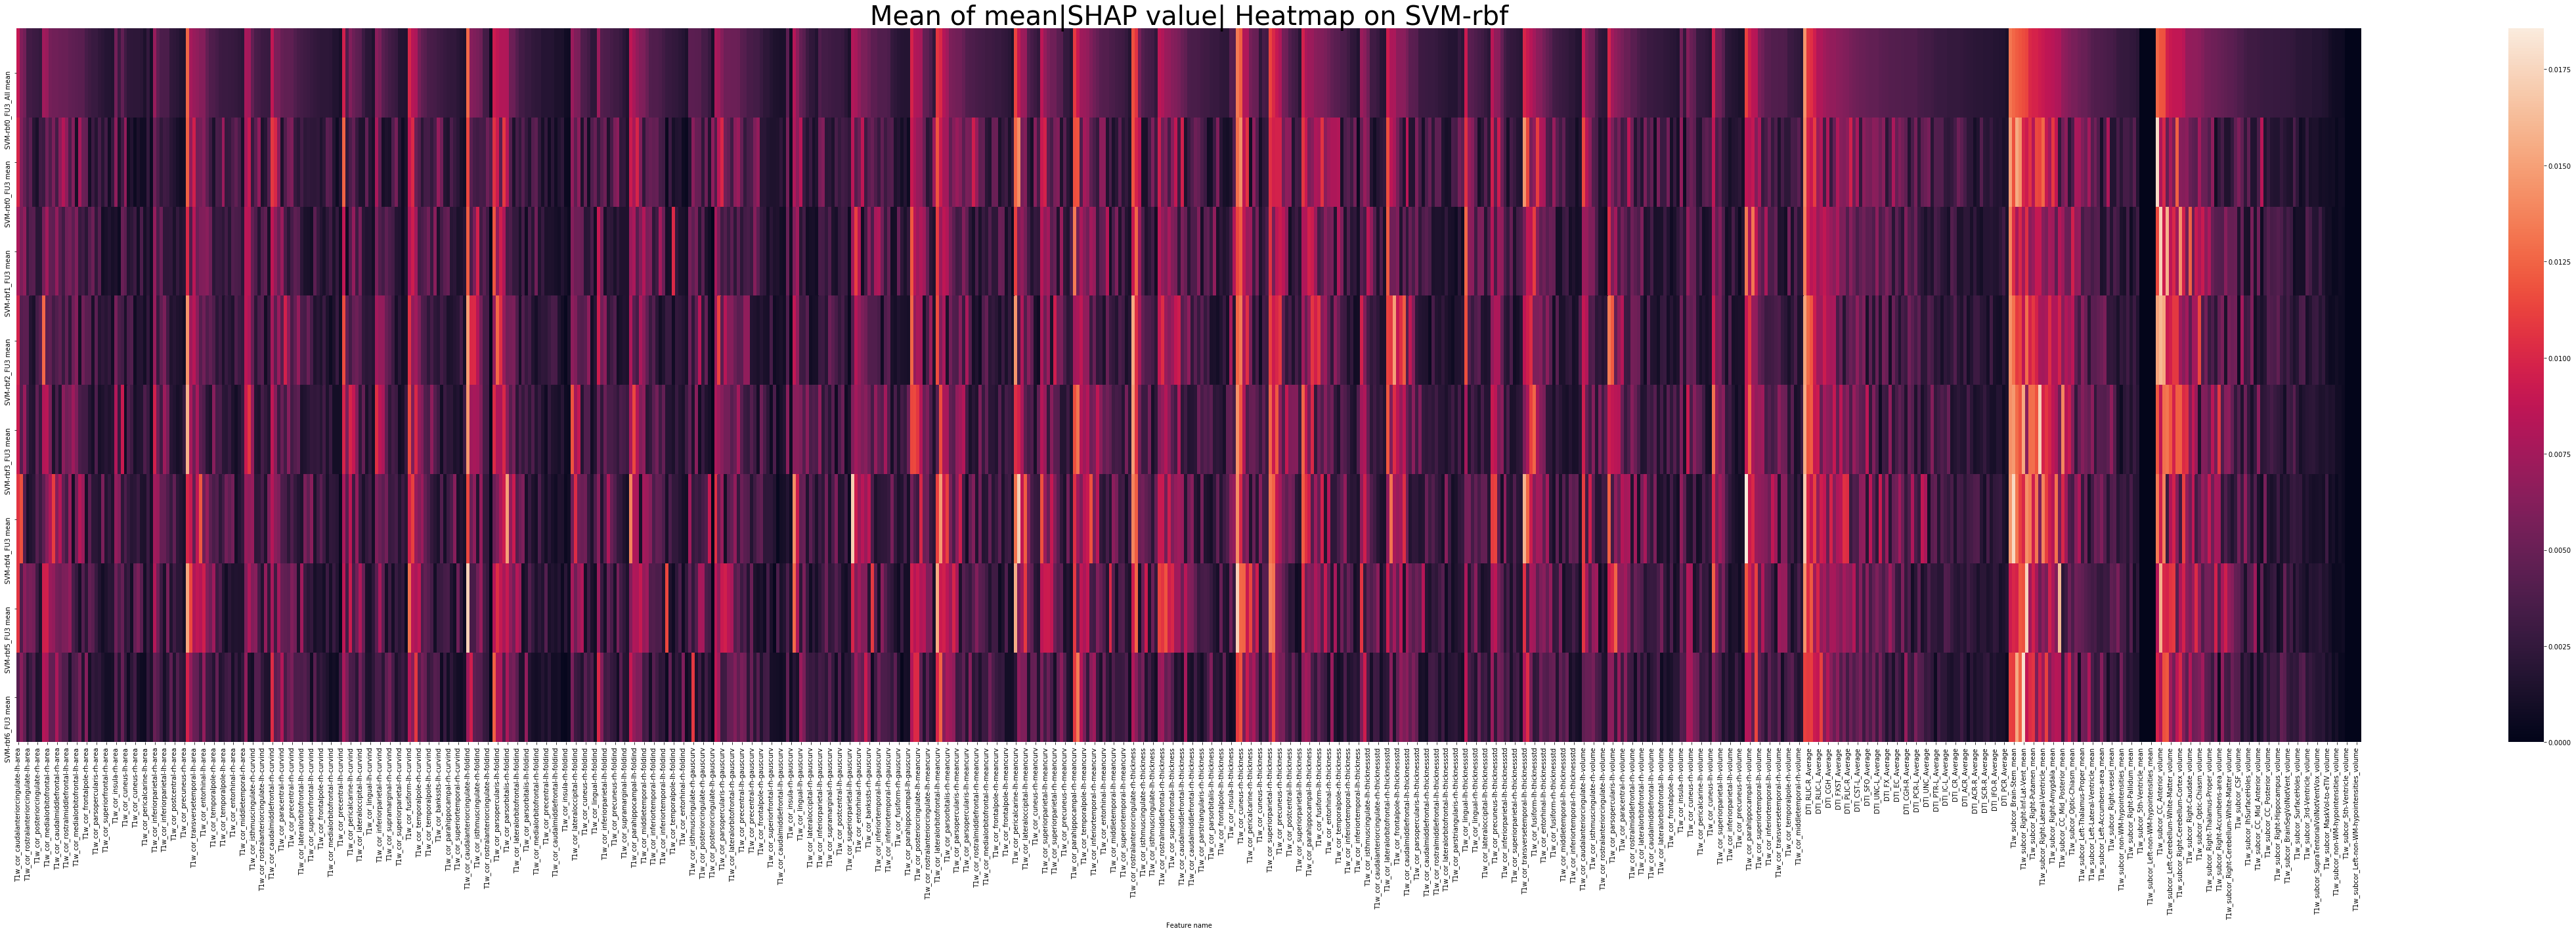

In [91]:
col = list(SHAP2.columns[63:64])+list(SHAP2.columns[25:32])
SHAP2 = SHAP2[col]
SHAP_T = SHAP2.transpose()
ax = sns.heatmap(SHAP_T)

plt.title('Mean of mean|SHAP value| Heatmap on SVM-rbf', fontsize=40)
# plt.savefig('figures/Heatmap_SHAP_value_SVM_rbf.pdf')
plt.show()

In [ ]:
# plt.pcolor(SHAP_T)
# plt.title('Heatmap of Feature importance', fontsize=20)
# plt.colorbar()

<b> Sorted by region specific </b>

In [93]:
SHAP2 = SHAP.sort_values(by=['Type','Lobe Region','SVM-rbf0_FU3_All mean'],
                         ascending=[True,True,False])

Text(0.5, 1.0, 'Mean of mean|SHAP value| Heatmap on SVM-rbf')

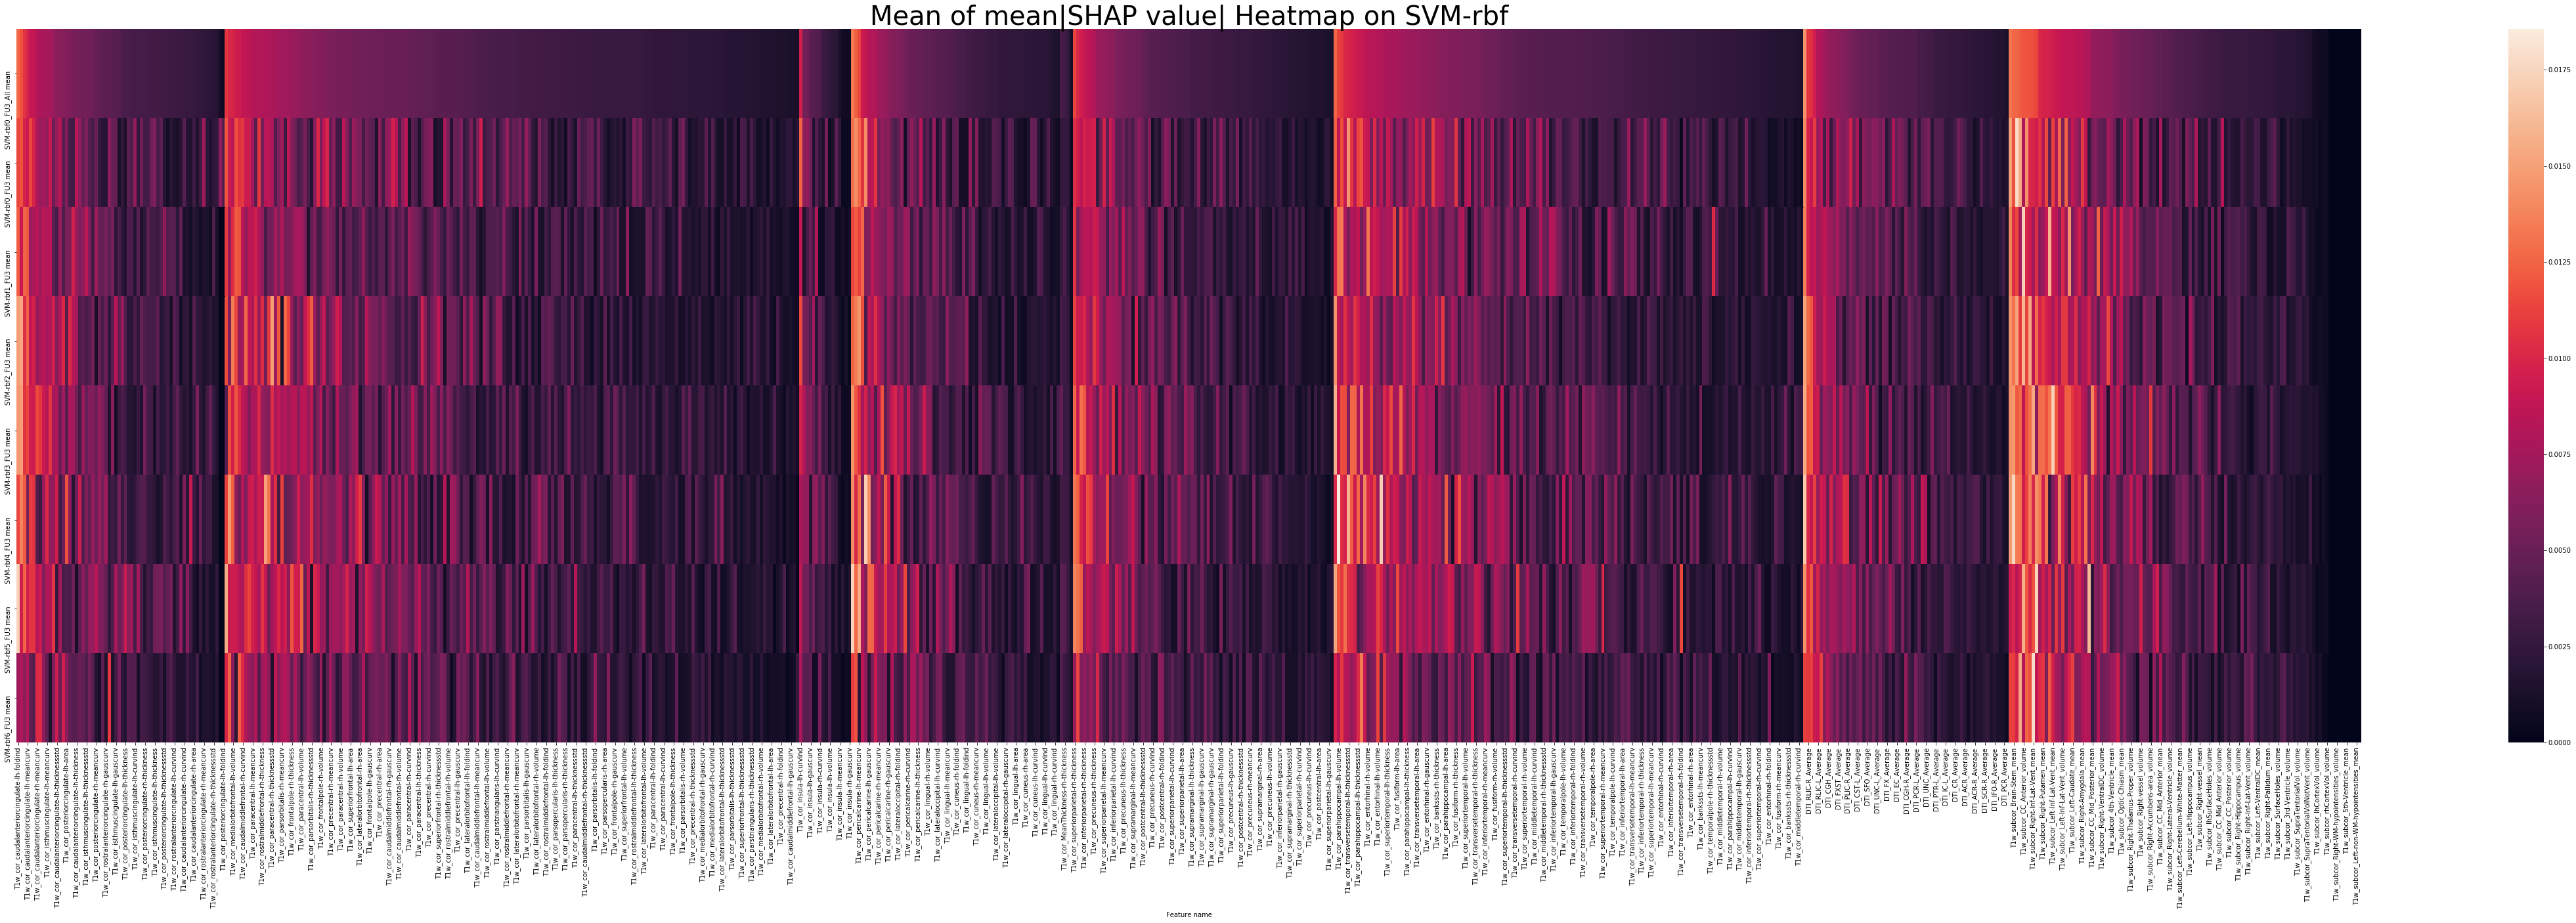

In [96]:
SHAP2 = SHAP2.set_index('Feature name')
col = list(SHAP2.columns[63:64])+list(SHAP2.columns[25:32])
SHAP2 = SHAP2[col]
SHAP_T = SHAP2.transpose()
ax = sns.heatmap(SHAP_T)
plt.title('Mean of mean|SHAP value| Heatmap on SVM-rbf', fontsize=40)
# plt.savefig('figures/Heatmap_SHAP_region_SVM_rbf.pdf')

In [ ]:
# SHAP_T.style.background_gradient(cmap='Blues')

In [97]:
SHAP_SVM_rbf_T = SHAP_T.iloc[0:1]
SHAP_SVM_rbf_T = SHAP_SVM_rbf_T.astype('float')

Text(0.5, 1.0, 'Heatmap of mean|SHAP value| on SVM-rbf')

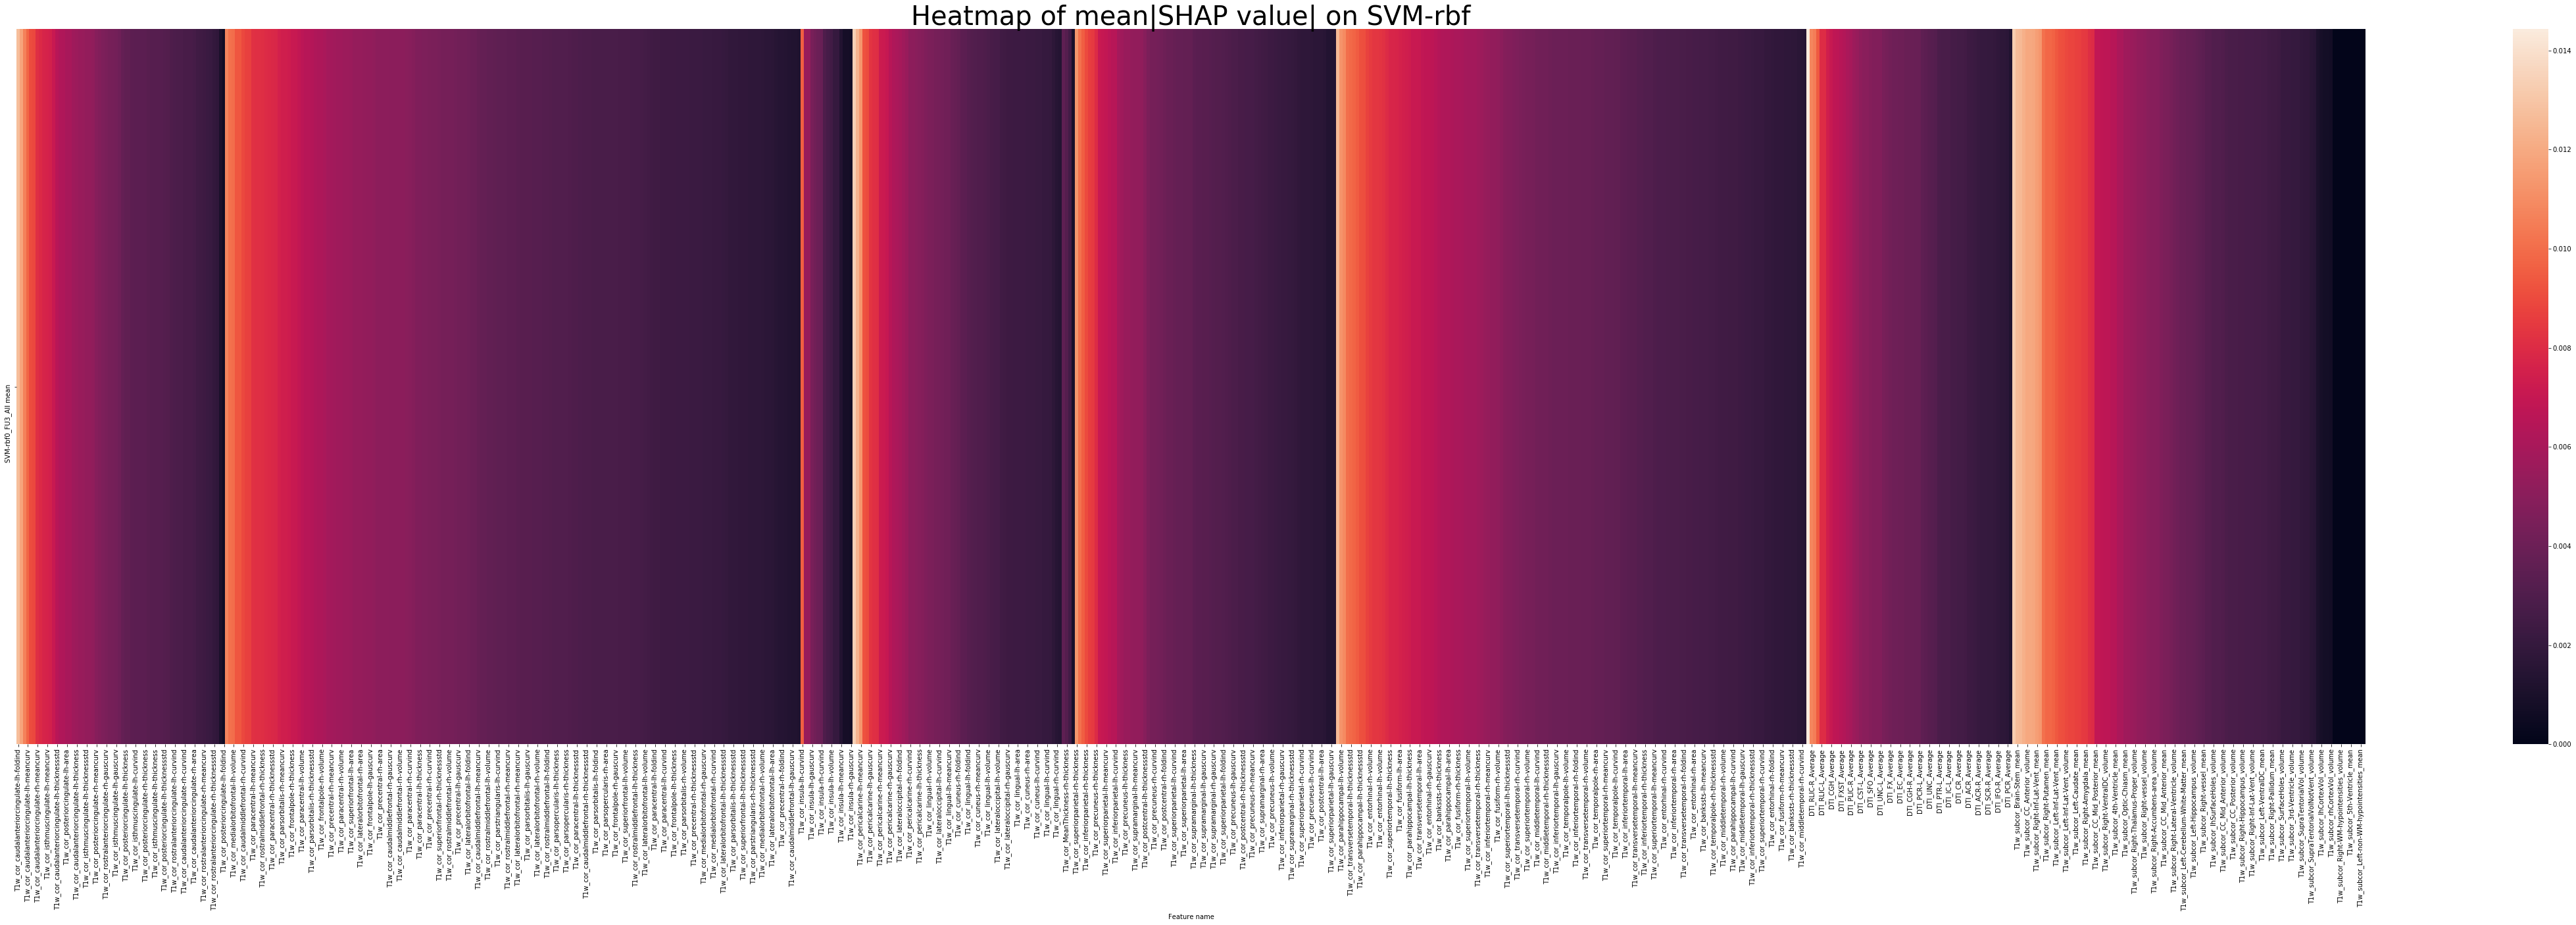

In [98]:
ax = sns.heatmap(SHAP_SVM_rbf_T)
plt.title('Heatmap of mean|SHAP value| on SVM-rbf', fontsize=40)
# plt.savefig('figures/Heatmap_SHAP_SVM_rbf.pdf')

In [ ]:
# SHAP_SVM_rbf_T.style.background_gradient(cmap='Blues')

<b> SVM rbf: ['SVM_rbf_All mean] </b>

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [100]:
SHAP4 = SHAP.sort_values(by=['SVM-rbf0_FU3_All mean'],
                         ascending=[False])
SVM = SHAP4[['SVM-rbf0_FU3 mean','SVM-rbf1_FU3 mean','SVM-rbf2_FU3 mean','SVM-rbf3_FU3 mean',
             'SVM-rbf4_FU3 mean','SVM-rbf5_FU3 mean','SVM-rbf6_FU3 mean','SVM-rbf0_FU3_All mean']]#,'Col names']]
SVM2 = SVM.reset_index(drop=True)

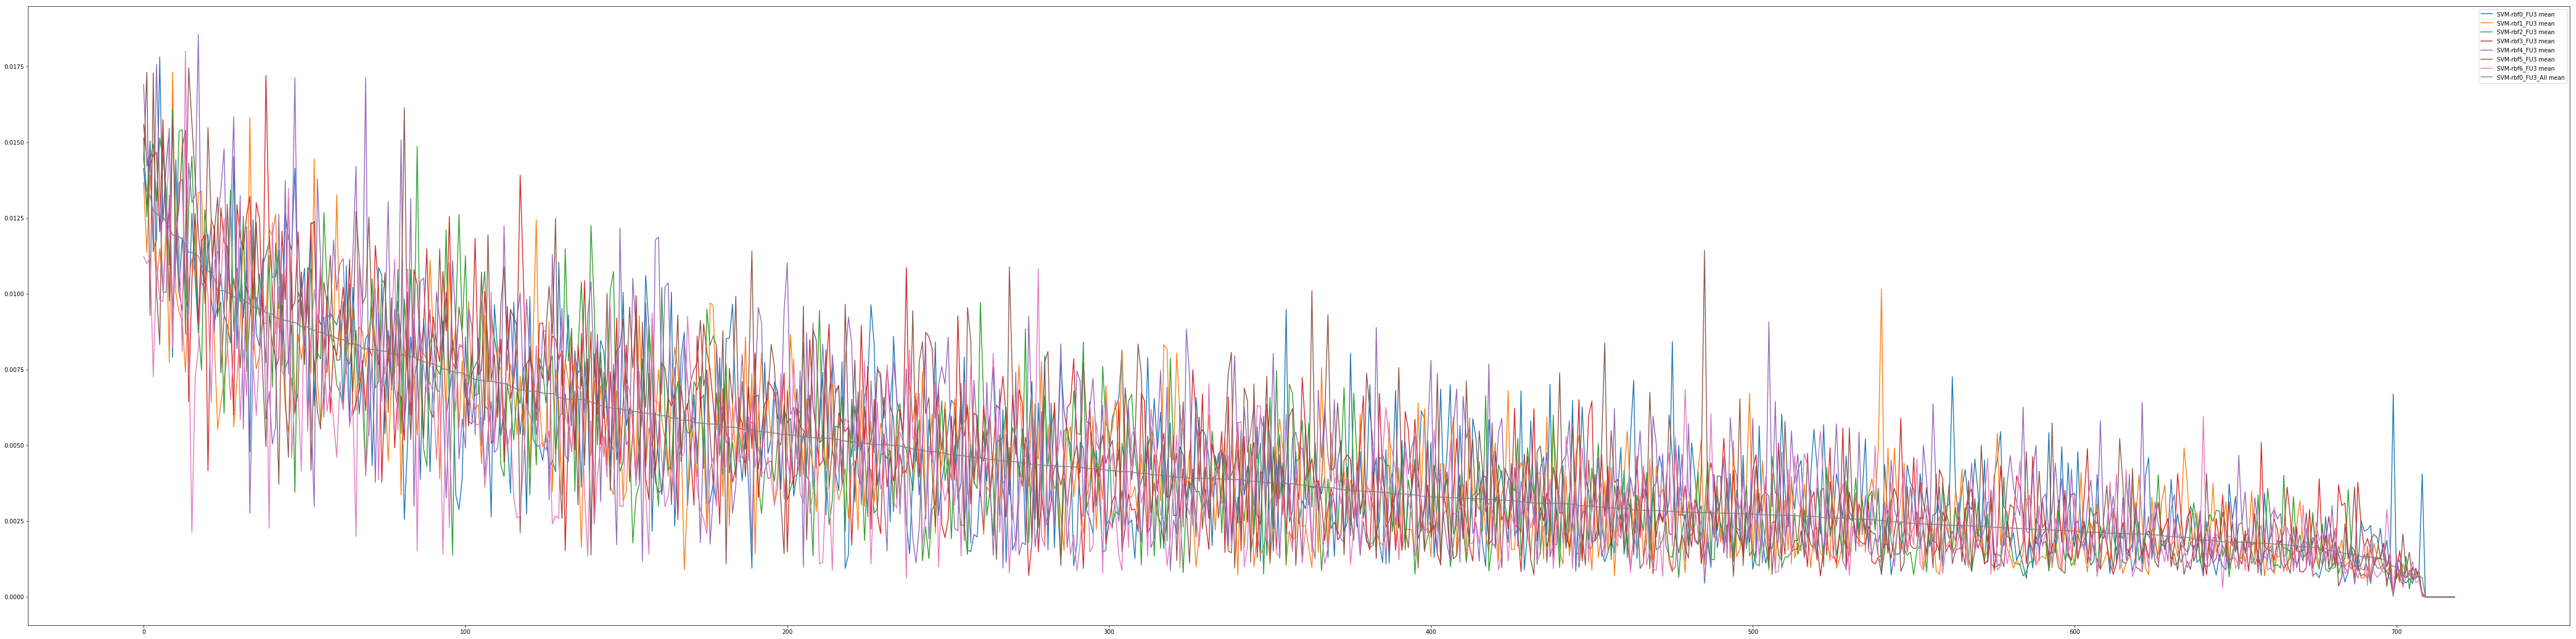

In [101]:
SVM2[SVM2.columns[0:8]].plot()

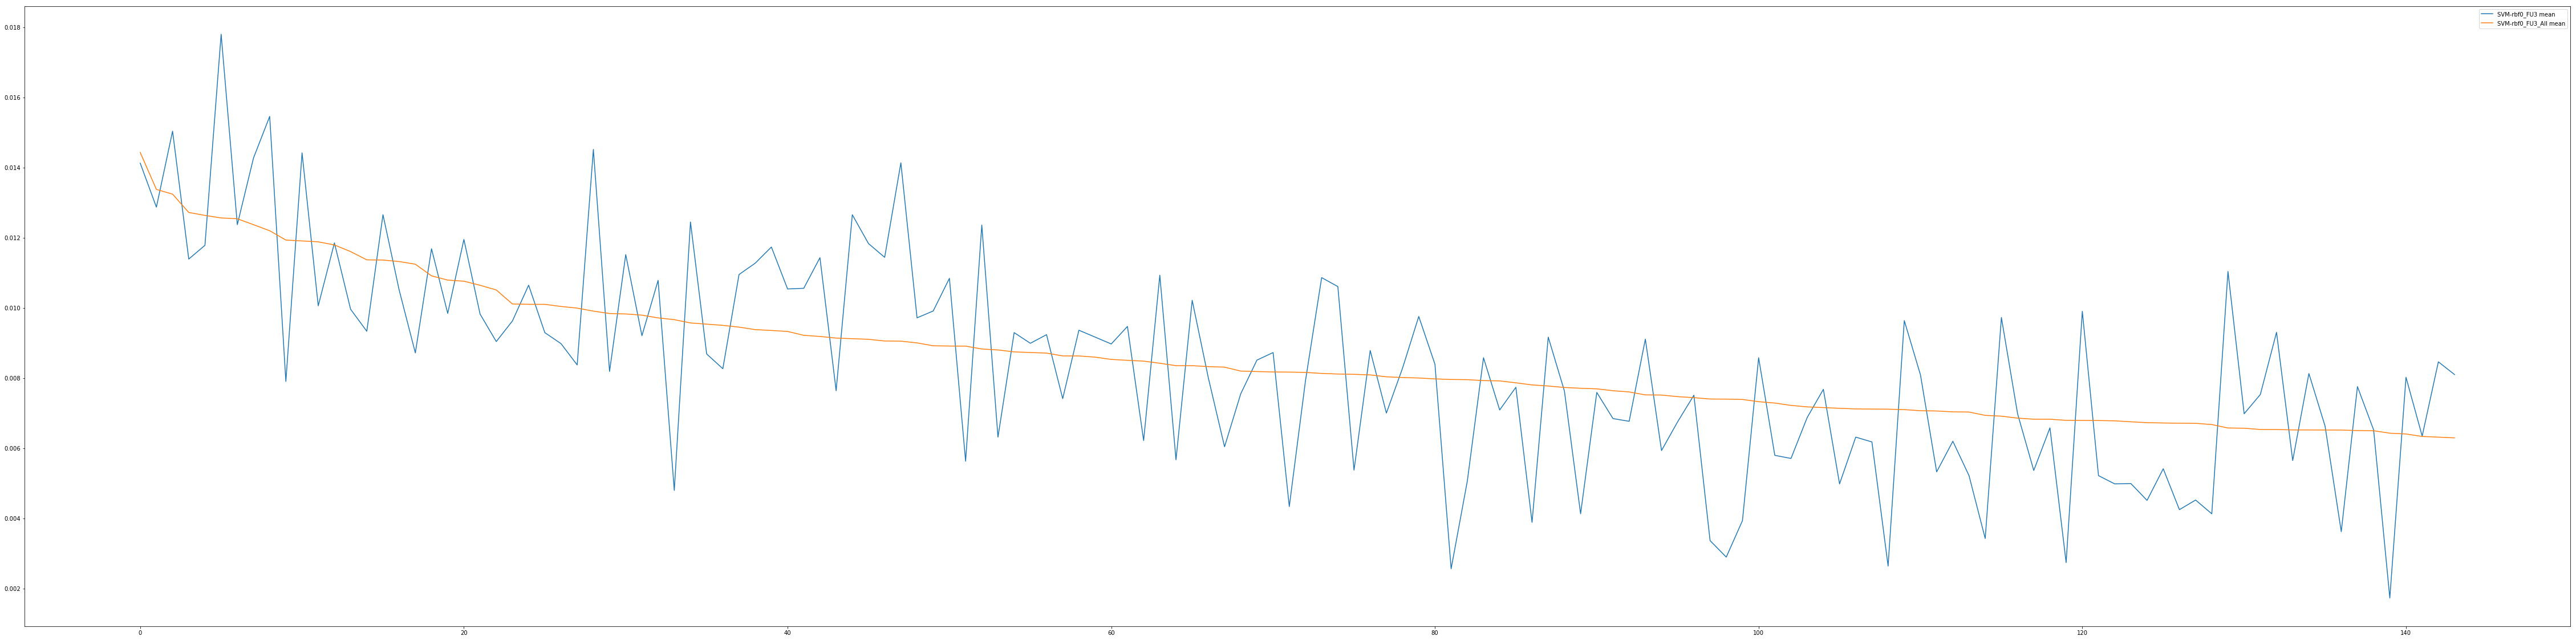

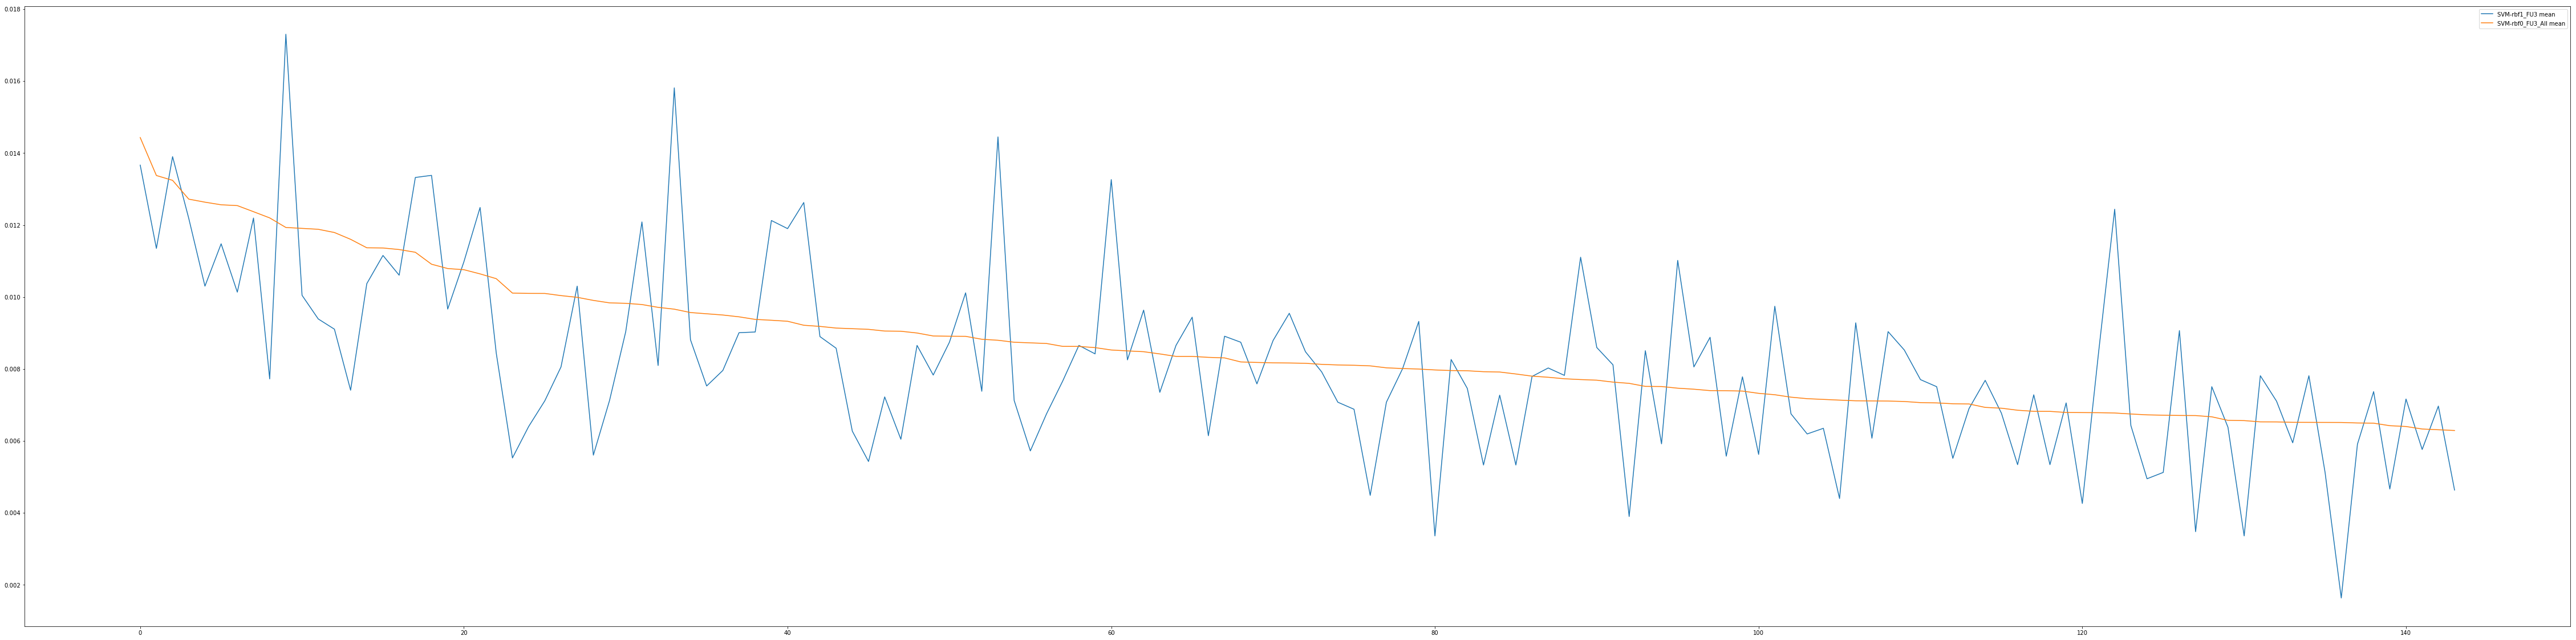

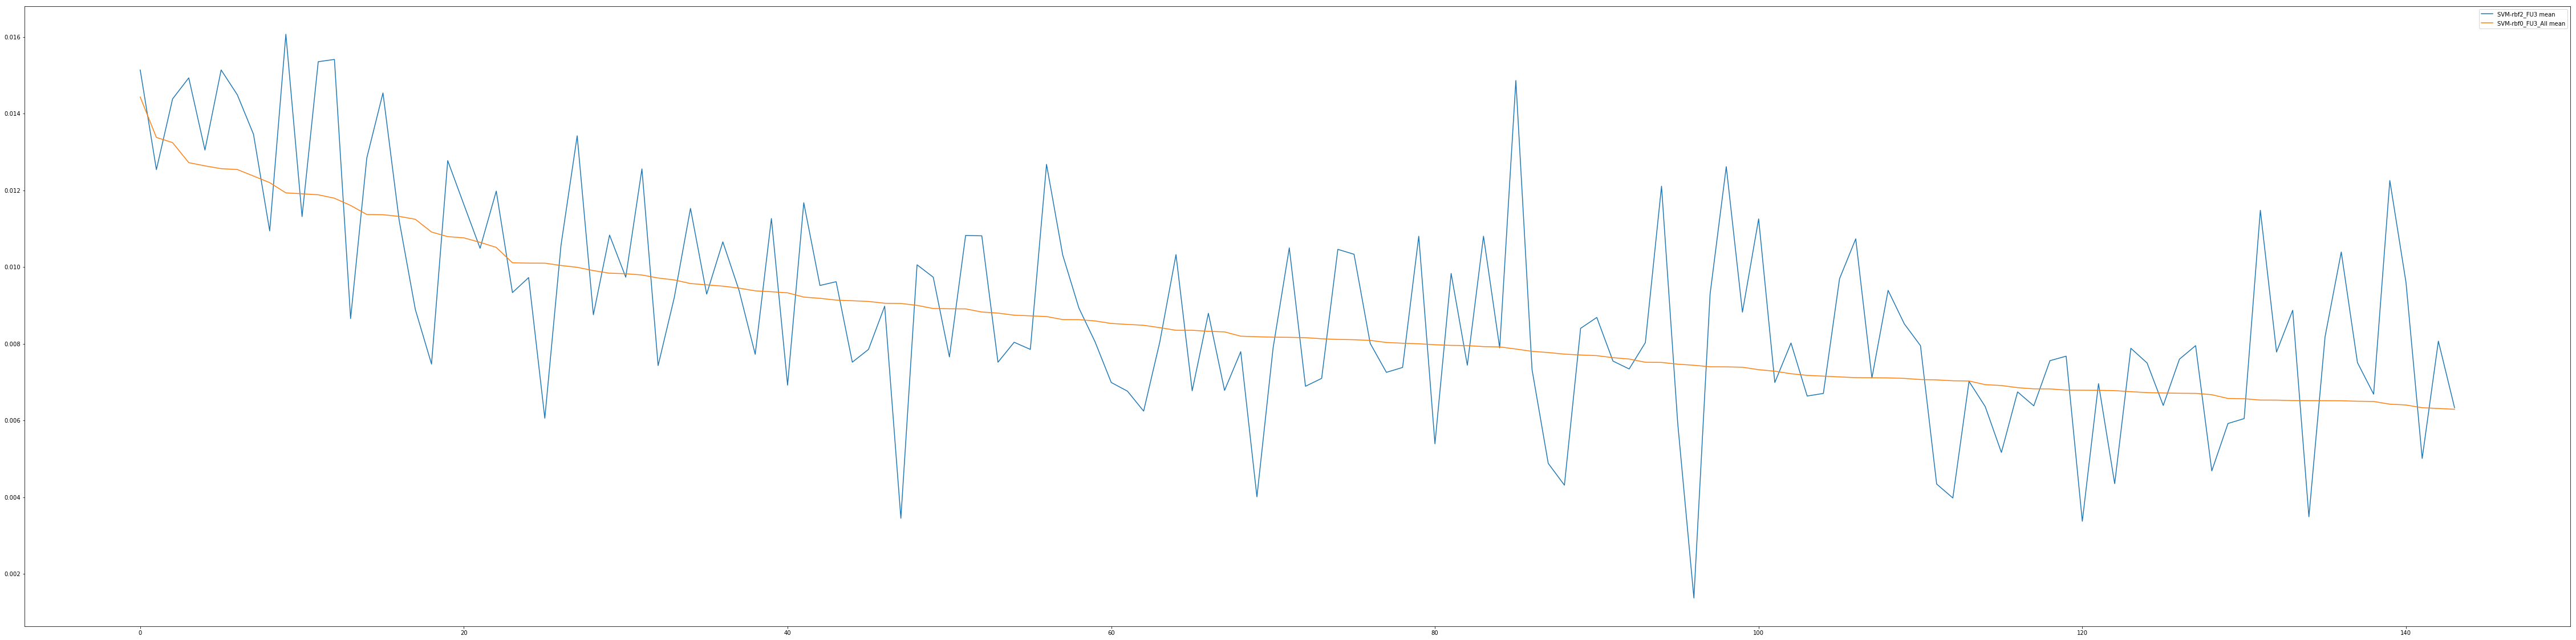

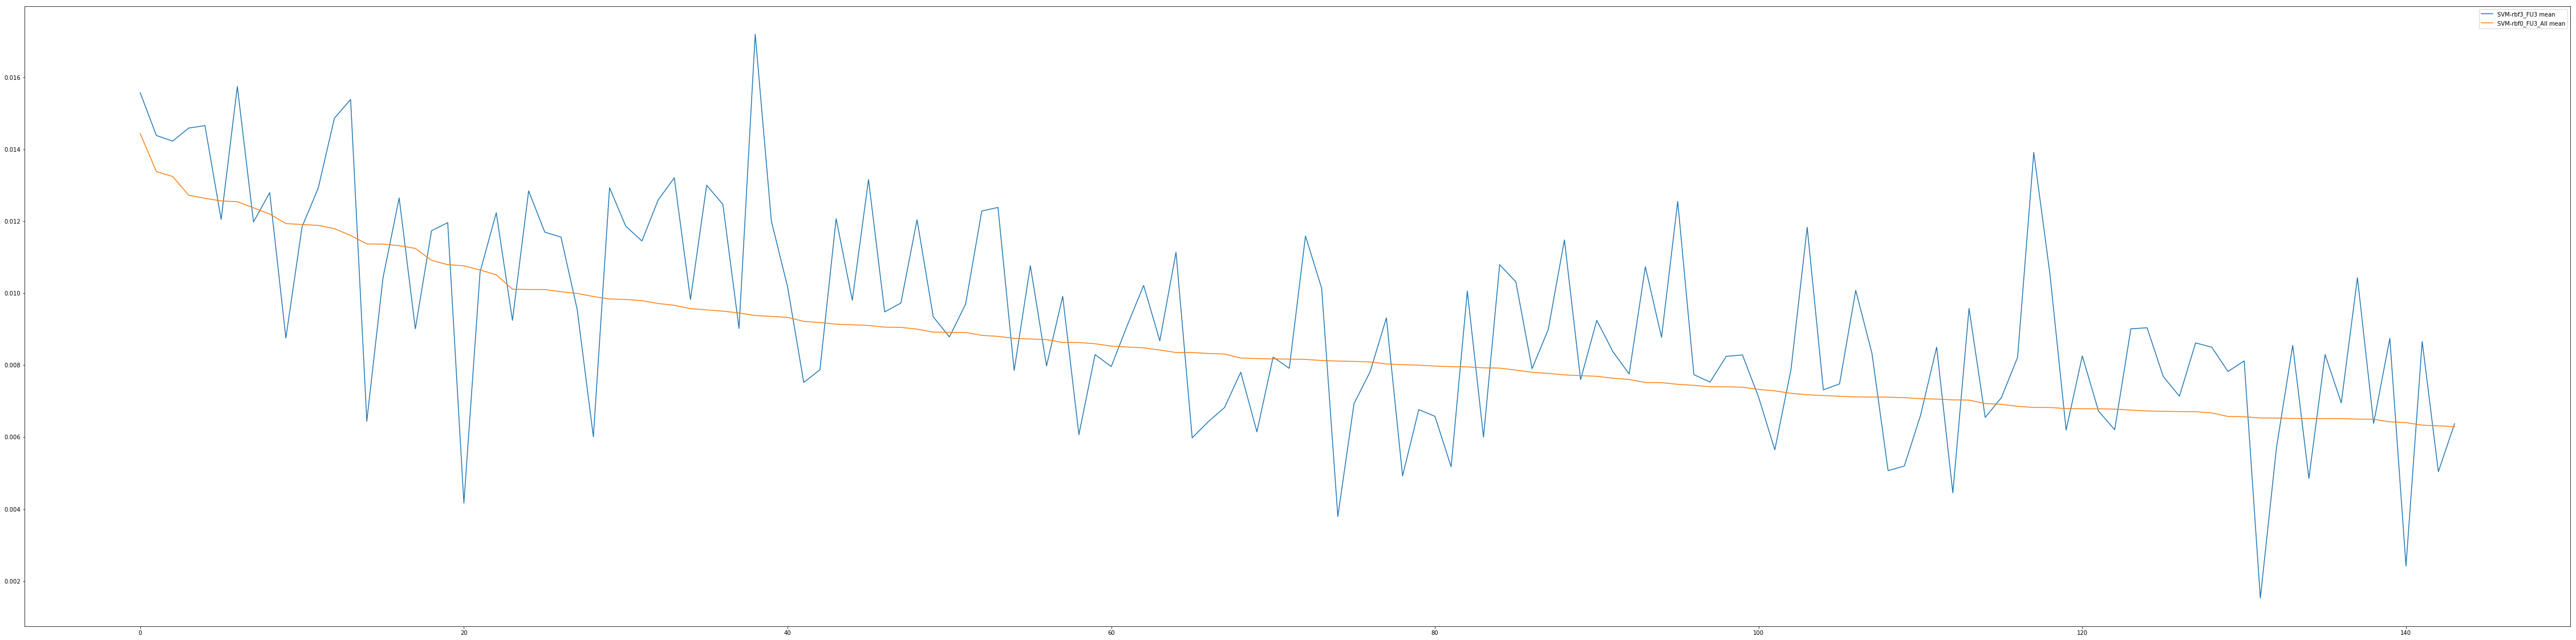

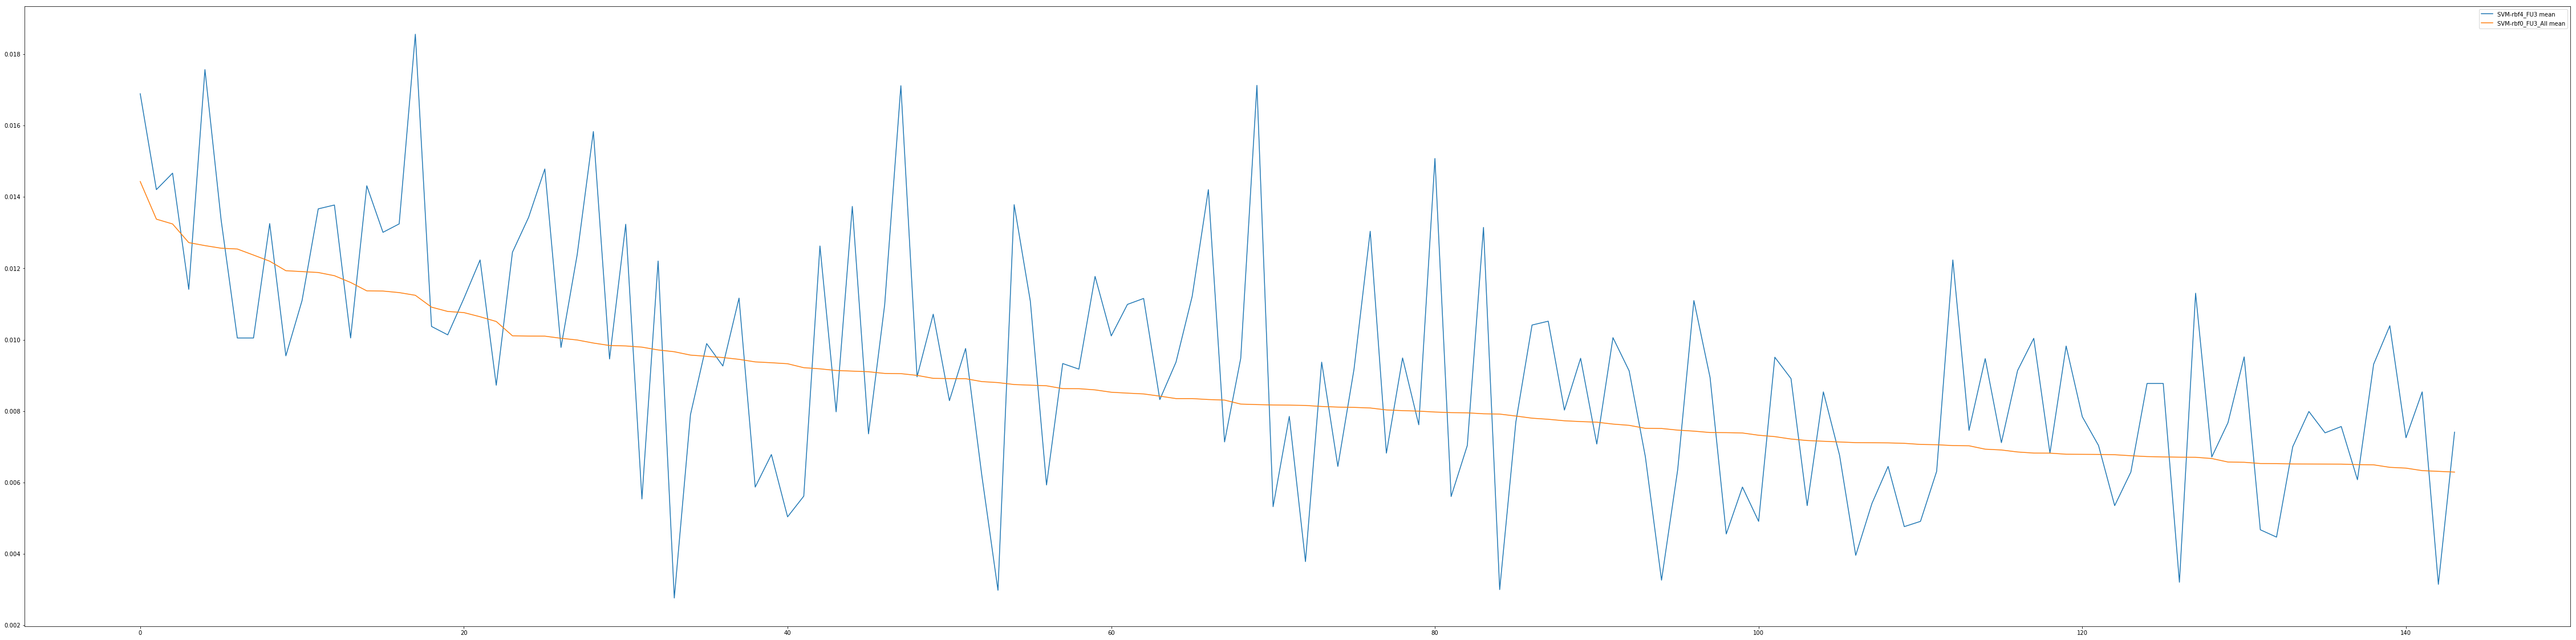

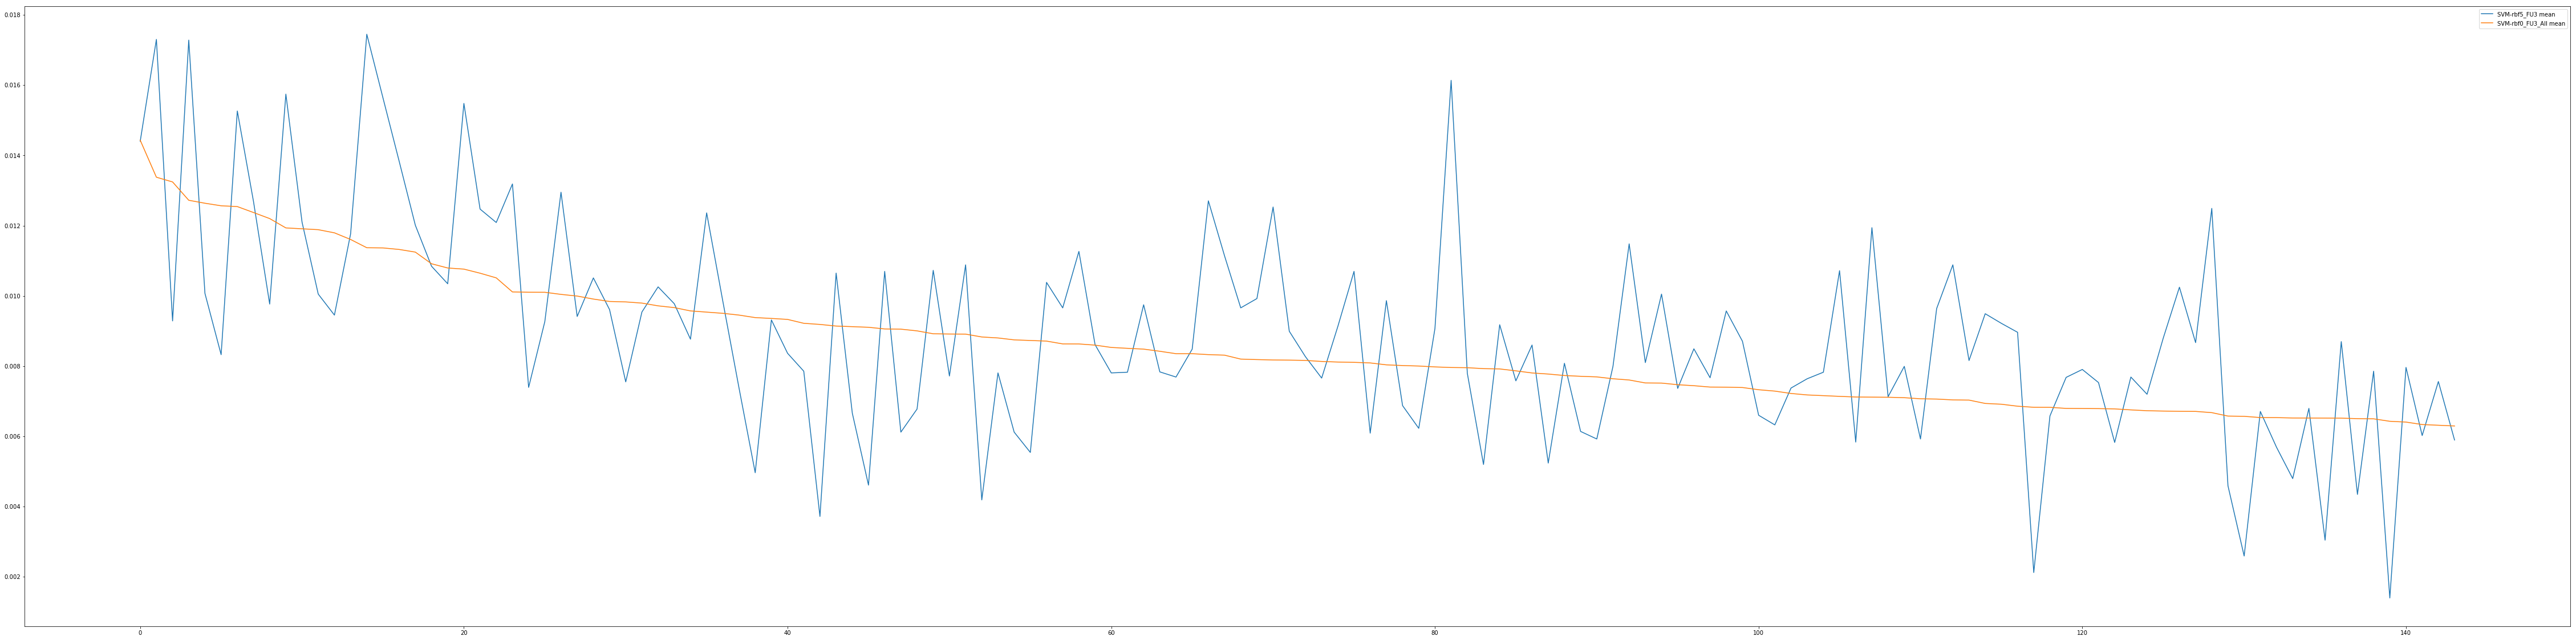

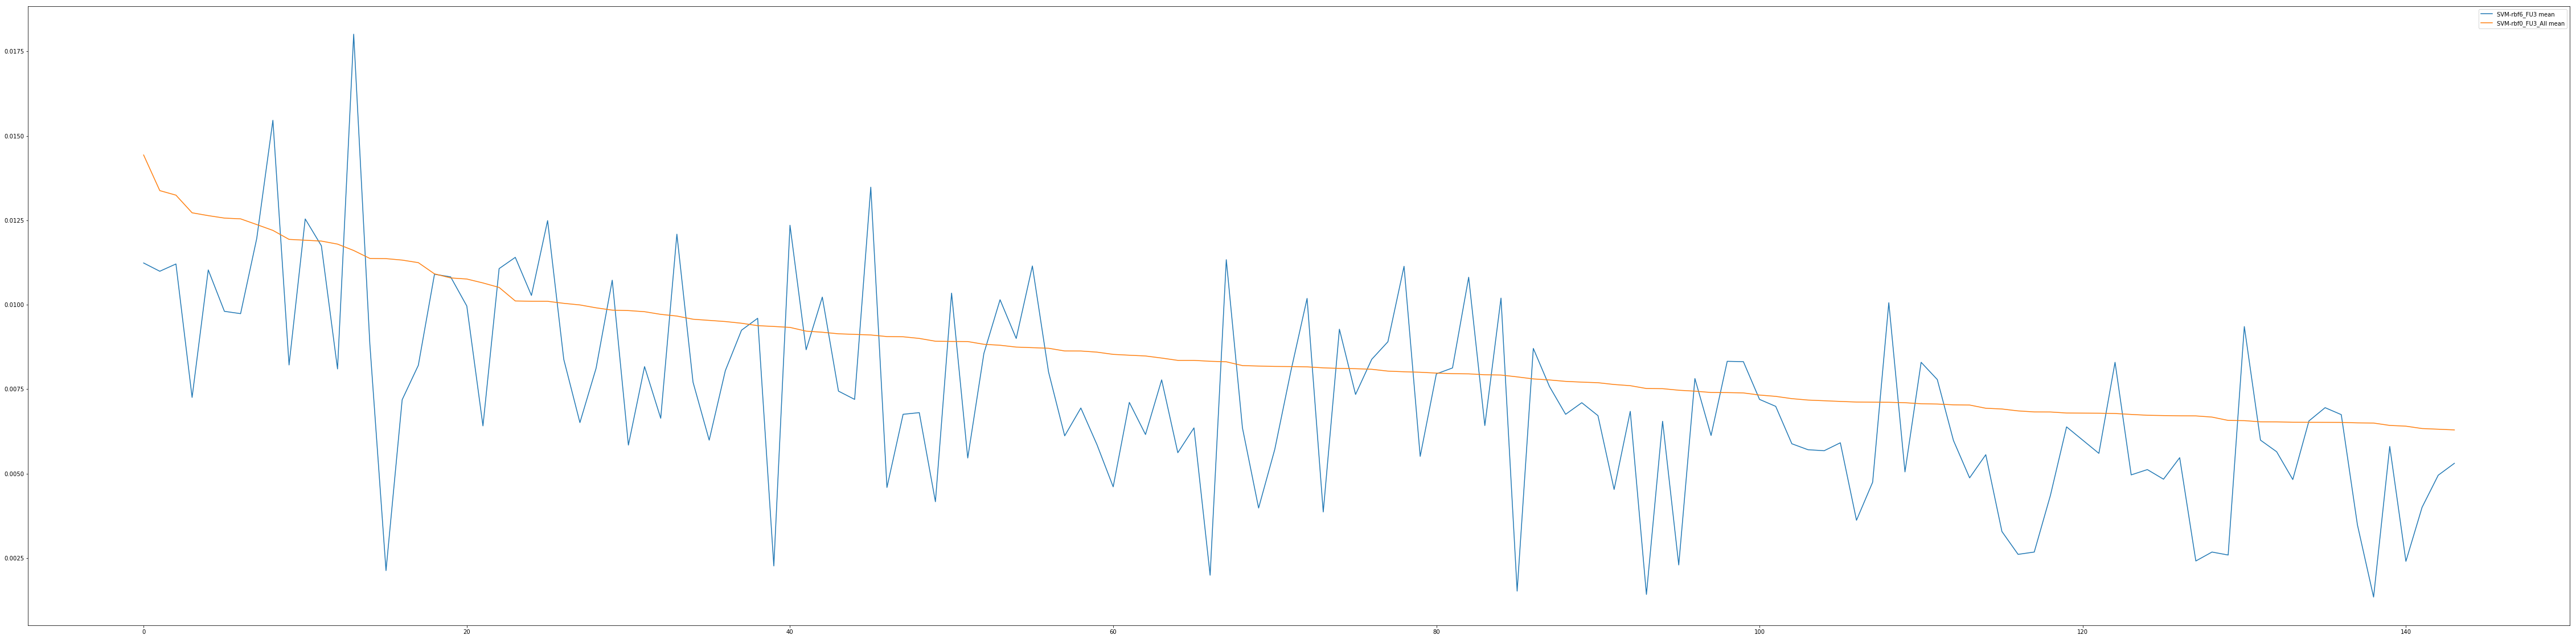

In [102]:
SVM2[list(SVM2.columns[0:1])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[1:2])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[2:3])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[3:4])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[4:5])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[5:6])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[6:7])+list(SVM2.columns[7:8])].loc[:143].plot()

### 4.1.6. Clustering the Feature importance in SVM-rbf

<b> Holdout feature clustering using SHAP</b>

In [103]:
with open('explainers/holdout_clustering.sav', 'rb') as fp:
    load_clustering = pickle.load(fp)

In [104]:
with open('explainers/SVM-rbf0_multi.sav', 'rb') as fp:
    load_shap_values = pickle.load(fp)

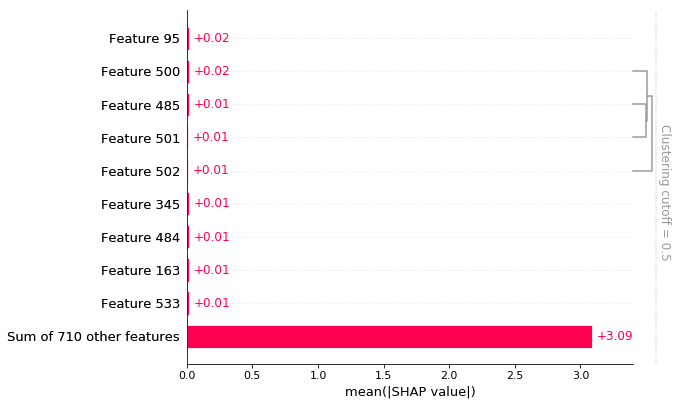

In [105]:
shap.plots.bar(load_shap_values, clustering=load_clustering)

<b> Clustering feature using Seaborn

(to do)

## 4.2. SHAP in Brain

### 4.2.1. Using FSL and Nilearn

<b> ROI 01: Visualization in MNI template

In [ ]:
from nilearn import plotting
# https://nilearn.github.io/modules/generated/nilearn.plotting.plot_roi.html#nilearn.plotting.plot_roi

In [ ]:
svm_result = '/ritter/share/jihoon/imagen_ml/posthoc_analysis/svmrbf0.nii.gz'
stat_img = "/ritter/share/data/IMAGEN/IMAGEN_prep-brainmask_BIDS/sub-000001123104/FU3/anat/sub-000001123104_ses-FU3_fs-brainmask_T1w_warped.nii.gz"

In [ ]:
view = plotting.view_img(svm_result)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

In [ ]:
plotting.plot_roi(stat_img, cmap='Paired')

In [ ]:
view = plotting.view_img(svm_result, bg_img=stat_img)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

In [ ]:
plotting.plot_roi(svm_result, bg_img=stat_img, cmap='Paired')

<b> appendix: Surface

In [ ]:
from nilearn import plotting

In [ ]:
# https://nilearn.github.io/modules/generated/nilearn.plotting.view_img_on_surf.html

In [ ]:
view = plotting.view_img_on_surf(stat_img, threshold='90%')
# view.open_in_browser()

view

In [ ]:
# Retrieve destrieux parcellation in fsaverage5 space from nilearn
from nilearn import datasets

destrieux_atlas = datasets.fetch_atlas_surf_destrieux()

# The parcellation is already loaded into memory
parcellation = destrieux_atlas['map_left']

# Retrieve fsaverage5 surface dataset for the plotting background. It contains
# the surface template as pial and inflated version and a sulcal depth maps
# which is used for shading
fsaverage = datasets.fetch_surf_fsaverage()

# The fsaverage dataset contains file names pointing to the file locations
print('Fsaverage5 pial surface of left hemisphere is at: %s' %
      fsaverage['pial_left'])
print('Fsaverage5 inflated surface of left hemisphere is at: %s' %
      fsaverage['infl_left'])
print('Fsaverage5 sulcal depth map of left hemisphere is at: %s' %
      fsaverage['sulc_left'])

In [ ]:
fsaverage

In [ ]:
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.5)

### 4.2.2. Using FreeSurfer and Nilearn